In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import numpy as np
from webcolors import hex_to_rgb
%matplotlib inline

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)  

# Load Data

In [6]:
def load_raw_data():
    df_pubmed = pd.read_excel("data/Scoping_review_text-analysis_extraction_2024.xlsx", sheet_name="Harmonized Information Extracti")
    df_pubmed['publication_type'] = "biomedical_journal"
    df_acl = pd.read_excel("data/Scoping_review_text-analysis_extraction_2024.xlsx", sheet_name="ACLEMNLP Google Scholar")
    df_acl['publication_type'] = "nlp_venue"
    return df_pubmed, df_acl

In [8]:
df_pubmed, df_acl = load_raw_data()

# ACL sheet has several blanc rows that are filtered out
columns_to_check = ['author', 'doi', 'Link to paper', 'title', 'journal', 'year']
df_acl = df_acl.dropna(subset=columns_to_check, how='all')
df_pubmed.shape, df_acl.shape

((504, 71), (83, 68))

In [9]:
#df_acl[df_acl['year'].isna()]


In [12]:
def load_raw_data_included_all():
    df_pubmed, df_acl = load_raw_data()
    df_included = df_pubmed[df_pubmed['Included'] == 1.0]
    df_acl_included = df_acl[df_acl['Included'] == 1.0]
    df = pd.concat([df_included, df_acl_included], ignore_index=True)
    df['year'] = df['year'].astype(int)
    print(df_pubmed.shape, df_included.shape, df_acl.shape, df_acl_included.shape)
    return df

In [14]:
df_2024 = pd.read_excel("data/Scoping_review_text-analysis_extraction_2024.xlsx", sheet_name="SED Version Sijing Extractions ")
## ALIGN WITH PREVIOUS NAMES
# Replace 'Association for Computational Linguistics' with 'ACL'
df_2024['journal'] = df_2024['journal'].str.replace('Association for Computational Linguistics', 'ACL', regex=False)
df_2024['journal'] = df_2024['journal'].str.replace('BMC bioinformatics', 'BMC Bioinformatics', regex=False)
df_2024['journal'] = df_2024['journal'].str.replace('Frontiers in psychiatry', 'Frontiers in Psychiatry', regex=False)

# Replace 'ACL Findings' followed by any characters with 'ACL/Findings'
df_2024['journal'] = df_2024['journal'].str.replace(r'ACL Findings.*', 'ACL/ Findings', regex=True)
df_2024['journal'] = df_2024['journal'].str.replace(r'Findings of the ACL.*', 'ACL/ Findings', regex=True)

df_2024['journal'] = df_2024['journal'].str.replace(r'EMNLP.*', 'EMNLP', regex=True)

df_2024['publication_type'] = np.where(
    df_2024['journal'].str.contains('EMNLP|ACL'), 
    'nlp_venue', 
    'biomedical_journal'
)

In [16]:
df_2024_included = df_2024[df_2024['Included'] == 1.0]
df_2024_included.loc[:, 'year'] = df_2024_included['year'].astype(int)


In [18]:
df_2024_included['year'].values

array([2023., 2023., 2023., 2023., 2023., 2024., 2023., 2023., 2023.,
       2023., 2023., 2023., 2023., 2023., 2023., 2023., 2023., 2023.,
       2023., 2023., 2023., 2023., 2023., 2023., 2023., 2023., 2023.,
       2023., 2023., 2023., 2023., 2023., 2023., 2023., 2023., 2023.,
       2023., 2023., 2023., 2023., 2023., 2023., 2023., 2023., 2023.,
       2023., 2023., 2023., 2023., 2023., 2023., 2023., 2023., 2023.,
       2023., 2023.])

In [20]:
df_initial = load_raw_data_included_all()

(504, 71) (89, 71) (462, 68) (51, 68)


In [21]:
# Creating sets of lowercased titles for each DataFrame
titles_df1 = set(df_initial['title'].str.lower())
titles_df2 = set(df_2024_included['title'].str.lower())

# Finding the intersection of the two sets
overlap_titles = titles_df1.intersection(titles_df2)

# Counting the number of overlaps
number_of_overlaps = len(overlap_titles)

In [24]:
overlap_titles

set()

In [26]:
df_initial['Target application'] = df_initial['Target application'].replace('Machine Reading Coprehension', 'Machine Reading Comprehension')
df_2024_included['Target application'] = df_2024_included['Target application'].replace('Machine Reading Coprehension', 'Machine Reading Comprehension')


/var/folders/nd/2fzvhsh510gbt9x6z5pdb1gr0000gn/T/ipykernel_37234/131202780.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [28]:
all_reviewed_articles = pd.concat([df_pubmed, df_acl, df_2024], ignore_index=True)

In [30]:
columns_to_check = ['author', 'doi', 'Link to paper', 'title', 'journal', 'year']
all_reviewed_articles = all_reviewed_articles.dropna(subset=columns_to_check, how='all')

In [32]:
all_reviewed_articles.groupby(['publication_type']).size()

publication_type
biomedical_journal    604
nlp_venue             117
dtype: int64

In [34]:
df = pd.concat([df_initial, df_2024_included], ignore_index=True)

In [36]:
df.shape

(196, 74)

In [38]:
df.groupby("publication_type")["title"].count()

publication_type
biomedical_journal    137
nlp_venue              59
Name: title, dtype: int64

In [40]:
df.head(3)

,author,doi,Link to paper,title,journal,year,Extracted by,Included,Reason for exclusion,Target application,...,ST,m1,c5,c2,c1,OP,publication_type,Unnamed: 40,Data availability,Unnamed: 33
0,"Abdelkader, W. and Navarro, T. and Parrish, R....",10.2196/29398,https://doi.org/10.2196/29398,A Deep Learning Approach to Refine the Identif...,JMIR Research Protocols,2021.0,BVI,1,NaN,Text Classification,...,A Deep Learning Approach to Refine the Identif...,NaN,NaN,NaN,NaN,NaN,biomedical_journal,NaN,NaN,NaN
1,"Alachram, H. and Chereda, H. and Beisbarth, T....",10.1371/journal.pone.0258623,https://doi.org/10.1371/journal.pone.0258623,Text mining-based word representations for bio...,PLoS ONE [Electronic Resource],2021.0,BVI,1,NaN,Information Extraction,...,Text mining-based word representations for bio...,NaN,NaN,NaN,NaN,NaN,biomedical_journal,NaN,NaN,NaN
2,"Ambalavanan, A. K. and Devarakonda, M. V.",10.1016/j.jbi.2020.103578,https://doi.org/10.1016/j.jbi.2020.103578,Using the contextual language model BERT for m...,Journal of Biomedical Informatics,2020.0,BVI,1,NaN,Text Classification,...,Using the contextual language model BERT for m...,NaN,NaN,NaN,NaN,NaN,biomedical_journal,NaN,NaN,NaN


# Explorative

## Overview excluded papers

In [44]:
df_pubmed.shape, df_acl.shape, df_2024.shape

((504, 71), (83, 68), (136, 61))

In [46]:
df_bio_excluded = df_pubmed[df_pubmed['Included'] != 1]
df_acl_excluded = df_acl[df_acl['Included'] != 1]
df_2024_excluded = df_2024[df_2024['Included'] != 1]

len(df_bio_excluded), len(df_acl_excluded), len(df_2024_excluded)

(415, 32, 80)

In [48]:
#df_acl_excluded[df_acl_excluded['year'].isna()]

In [50]:
len(df_bio_excluded) + len(df_acl_excluded) + len(df_2024_excluded)

527

In [52]:
df_excluded = pd.concat([df_bio_excluded, df_acl_excluded, df_2024_excluded], ignore_index=True)
columns_to_check = ['author', 'doi', 'Link to paper', 'title', 'journal', 'year']
df_excluded = df_excluded.dropna(subset=columns_to_check, how='all')
df_excluded.shape

(525, 74)

In [54]:
#df_excluded['year'] = df_excluded['year'].astype(int)
df_excluded[df_excluded['year'].isna()]


,author,doi,Link to paper,title,journal,year,Extracted by,Included,Reason for exclusion,Target application,...,ST,m1,c5,c2,c1,OP,publication_type,Unnamed: 40,Data availability,Unnamed: 33


In [56]:
df_excluded = df_excluded[["Reason for exclusion", "year", "publication_type"]]

In [58]:
df_excluded.head(5)

,Reason for exclusion,year,publication_type
1,No LLMs,2017.0,biomedical_journal
2,No LLMs,2021.0,biomedical_journal
3,No LLMs,2022.0,biomedical_journal
4,No LLMs,2018.0,biomedical_journal
5,Review,2021.0,biomedical_journal


In [60]:
df_excluded["Reason for exclusion"] = df_excluded["Reason for exclusion"].str.replace(
    r'^No biomedical focus.*$', 'Different focus', regex=True)

df_excluded["Reason for exclusion"] = df_excluded["Reason for exclusion"].str.replace(
    r'^Focus on.*$', 'Different focus', regex=True)
df_excluded["Reason for exclusion"] = df_excluded["Reason for exclusion"].str.replace(
    r'^Not focused on model.*$', 'Different focus', regex=True)
df_excluded["Reason for exclusion"] = df_excluded["Reason for exclusion"].str.replace(
    r'^Not English.*$', 'Not English', regex=True)
df_excluded["Reason for exclusion"] = df_excluded["Reason for exclusion"].str.replace(
    r'^NO ACCESS.*$', 'no access', regex=True)
df_excluded["Reason for exclusion"] = df_excluded["Reason for exclusion"].str.replace(
    r'Review Paper', 'Review', regex=False)
df_excluded["Reason for exclusion"] = df_excluded["Reason for exclusion"].str.replace(
    r'Survey', 'Review', regex=False)
df_excluded["Reason for exclusion"] = df_excluded["Reason for exclusion"].str.replace(
    r'No LLMs, Review', 'Review', regex=False)
df_excluded["Reason for exclusion"] = df_excluded["Reason for exclusion"].str.replace(
    r'Protocol, not the actual work', 'Review', regex=False)
df_excluded["Reason for exclusion"] = df_excluded["Reason for exclusion"].str.replace(
    r'Includes vision', 'Different focus', regex=False)
df_excluded["Reason for exclusion"] = df_excluded["Reason for exclusion"].str.replace(
    r'Not text', 'Different focus', regex=False)
df_excluded["Reason for exclusion"] = df_excluded["Reason for exclusion"].str.replace(
    r'DUPLICATE with Simona ACL papers', 'DUPLICATE', regex=False)
df_excluded["Reason for exclusion"] = df_excluded["Reason for exclusion"].str.replace(
    r'No biomedical domain', 'Different focus', regex=False)
df_excluded["Reason for exclusion"] = df_excluded["Reason for exclusion"].str.replace(
    r'No LLMs (although benchmaerked with a BERT system)', 'No LLMs', regex=False)

df_excluded.groupby(['Reason for exclusion']).size().sort_values(ascending=False)

Reason for exclusion
No LLMs                                374
Different focus                         69
Review                                  47
Not English                             15
DUPLICATE                               11
no access                                6
Other                                    2
WITHDRAWN due to integrity concerns      1
dtype: int64

In [62]:
sum(df_excluded.groupby(['Reason for exclusion']).size().sort_values(ascending=False))

525

In [64]:
1131 - 137 - 59

935

In [66]:
137 + 59

196

In [68]:
1131 - 513

618

In [70]:
97 + 91 + 135

323

## Overview papers metadata

In [73]:
df = pd.concat([df_initial, df_2024_included], ignore_index=True)
df['year'] = df['year'].astype(int)
#df = df[df['year'] != 2024]

df.head(3)

,author,doi,Link to paper,title,journal,year,Extracted by,Included,Reason for exclusion,Target application,...,ST,m1,c5,c2,c1,OP,publication_type,Unnamed: 40,Data availability,Unnamed: 33
0,"Abdelkader, W. and Navarro, T. and Parrish, R....",10.2196/29398,https://doi.org/10.2196/29398,A Deep Learning Approach to Refine the Identif...,JMIR Research Protocols,2021,BVI,1,NaN,Text Classification,...,A Deep Learning Approach to Refine the Identif...,NaN,NaN,NaN,NaN,NaN,biomedical_journal,NaN,NaN,NaN
1,"Alachram, H. and Chereda, H. and Beisbarth, T....",10.1371/journal.pone.0258623,https://doi.org/10.1371/journal.pone.0258623,Text mining-based word representations for bio...,PLoS ONE [Electronic Resource],2021,BVI,1,NaN,Information Extraction,...,Text mining-based word representations for bio...,NaN,NaN,NaN,NaN,NaN,biomedical_journal,NaN,NaN,NaN
2,"Ambalavanan, A. K. and Devarakonda, M. V.",10.1016/j.jbi.2020.103578,https://doi.org/10.1016/j.jbi.2020.103578,Using the contextual language model BERT for m...,Journal of Biomedical Informatics,2020,BVI,1,NaN,Text Classification,...,Using the contextual language model BERT for m...,NaN,NaN,NaN,NaN,NaN,biomedical_journal,NaN,NaN,NaN


In [75]:
df.groupby(['publication_type']).size()

publication_type
biomedical_journal    137
nlp_venue              59
dtype: int64

11 2019
32 2020
41 2021
42 2022
70 2023


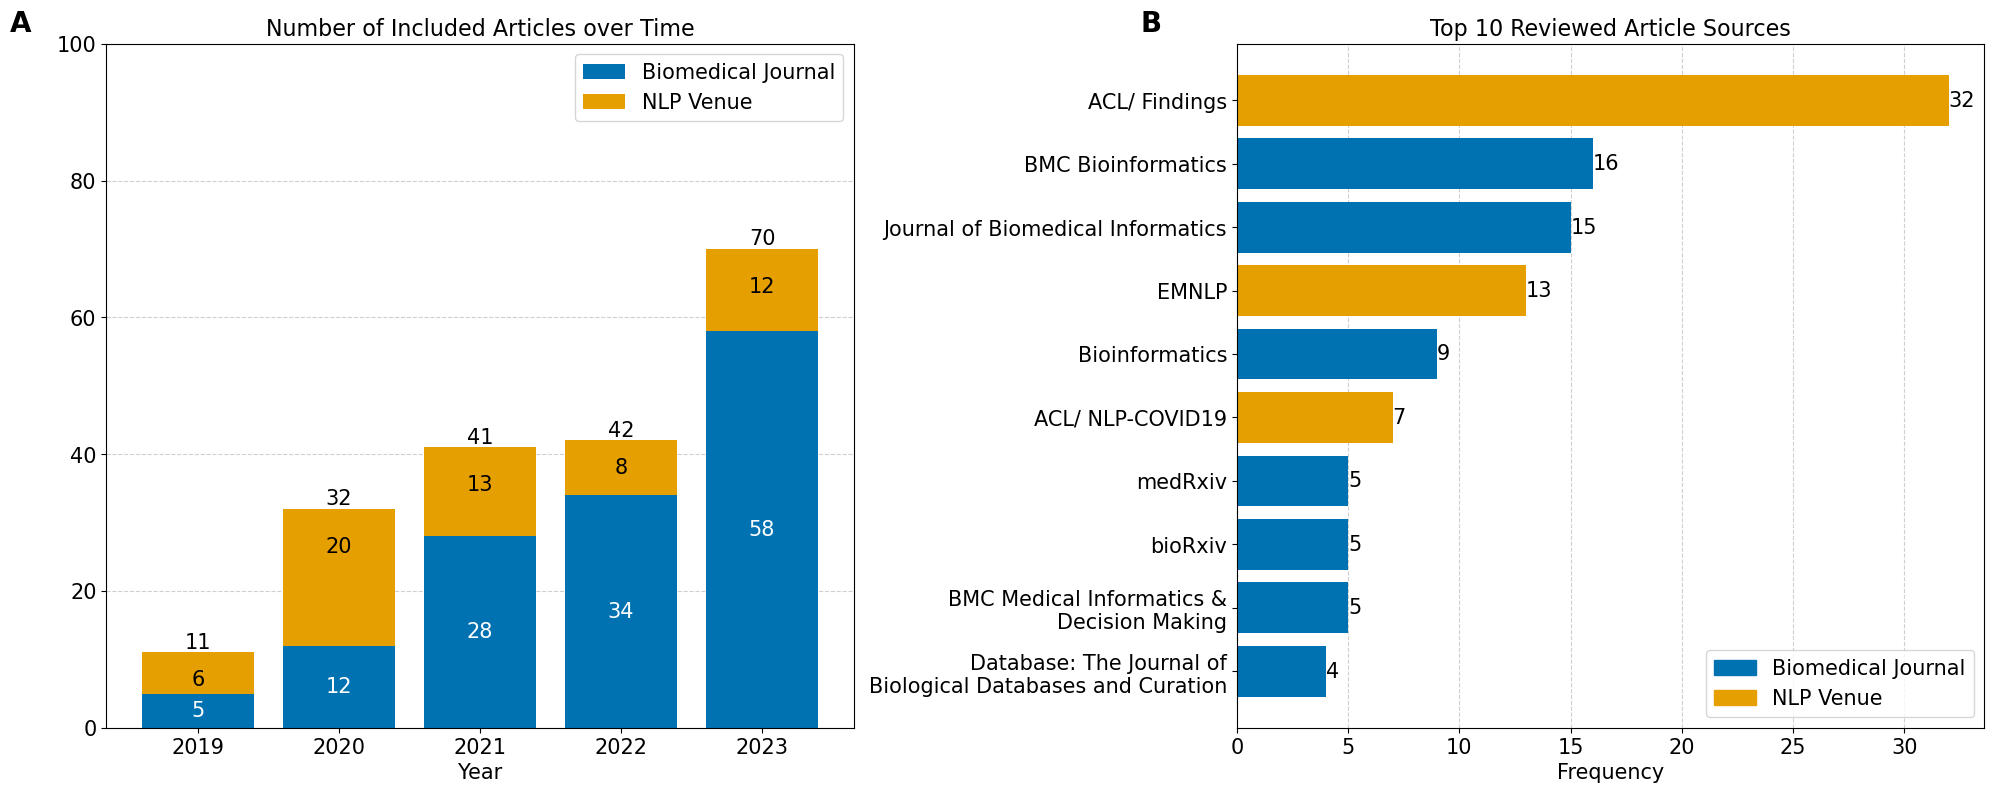

In [77]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import pandas as pd

# Assuming df and category_counts are your DataFrames
# You would need to have these DataFrames prepared with the necessary data
label_threshold = 5
# Create a larger figure and subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

df['year'] = df['year'].replace(2024, 2023)

# First plot
# Group by year and publication type, then count the occurrences
counts = df.groupby(['year', 'publication_type']).size().unstack(fill_value=0)

# Plot the stacked bar chart on the first subplot
bars = counts.plot(kind='bar', stacked=True, color=["#0072B2", "#E69F00"], width=0.8, ax=axes[0], zorder=2)
# Add horizontal grid lines for better readability in the second plot
axes[0].grid(axis='y', linestyle='--', alpha=0.6, zorder=1)
# Add identifier "A" to the upper left corner of the first plot
axes[0].text(-0.1, 1.05, 'A', transform=axes[0].transAxes, fontsize=20, fontweight='bold', va='top', ha='right')

# Add count values as annotations for the first plot
# (This code is adjusted to work with subplots)
for i, year in enumerate(counts.index):
    for pub_type, count in zip(counts.columns, counts.loc[year]):
        if pub_type == "biomedical_journal":
            total_count = counts.sum(axis=1)[year]
            #print(total_count, year)
            if total_count == 1:
                continue
            else:
                axes[0].text(i, count/2, str(count), color='white' if count < counts.sum(axis=1).max() else 'black', ha='center', va='center', fontsize=15)
        else:
            total_count = counts.sum(axis=1)[year]
            print(total_count, year)
            va = 'center' if count < 10 else 'top' if count >= label_threshold else 'bottom'
            if total_count == 1:
                continue
            else:
                axes[0].text(i, total_count - 4, str(count), color='black' if count < counts.sum(axis=1).max() else 'black', ha='center', va=va, fontsize=15)

# Add total count values on top of each bar for the first plot
for i, total_count in enumerate(counts.sum(axis=1)):
    axes[0].text(i, total_count, str(total_count), color='black', ha='center', va='bottom', fontsize=15)
    

# Customize the first plot
axes[0].set_ylim(0, 100)
axes[0].set_xticks(range(len(counts.index)))
axes[0].set_xticklabels(counts.index, rotation=360, fontsize=15)
axes[0].tick_params(axis='y', labelsize=15)
axes[0].set_xlabel('Year', fontsize=15)
#axes[0].set_ylabel('Number of Articles', fontsize=15)
axes[0].set_title('Number of Included Articles over Time', fontsize=16)
axes[0].legend(['Biomedical Journal', 'NLP Venue'], fontsize=15)

# SECOND PLOT
# Get the top 10 categories and sort in descending order
category_counts = df.groupby(['journal', 'publication_type']).size()
# Modify the value with "\n" added
category_counts = category_counts.rename("count")
category_counts = category_counts.reset_index()
category_counts['journal'] = category_counts['journal'].replace({
    "Database: The Journal of Biological Databases and Curation": "Database: The Journal of\nBiological Databases and Curation",
    "BMC Medical Informatics & Decision Making": "BMC Medical Informatics &\nDecision Making",
    "Association for Computational Linguistics/ Findings": "ACL/ Findings",
    "Association for Computational Linguistics/ BioNLP": "ACL/ BioNLP",
    "Association for Computational Linguistics/ NLP-COVID19": "ACL/ NLP-COVID19",
    "AMIA Summits on Translational Science Proceedings": "AMIA Summits on Translational\nScience Proceedings",
    "AMIA ... Annual Symposium Proceedings/AMIA Symposium":"AMIA Symposium"
})
top_10_categories = category_counts.groupby(['journal', 'publication_type'])['count'].sum().reset_index()
top_10_categories = top_10_categories.sort_values(by='count', ascending=False).head(10)

# Assign colors based on the publication type
colors = ["#0072B2" if pub_type == 'biomedical_journal' else "#E69F00" for pub_type in top_10_categories['publication_type']]
colors = colors[::-1]  # Reverse the order of colors

# Create a horizontal bar chart with different colors for the second subplot
bar_plot = axes[1].barh(top_10_categories['journal'][::-1], top_10_categories['count'][::-1], color=colors, zorder=2)

# Add identifier "B" to the upper left corner of the second plot
axes[1].text(-0.1, 1.05, 'B', transform=axes[1].transAxes, fontsize=20, fontweight='bold', va='top', ha='right')

# Customize the second plot
axes[1].set_xlabel('Frequency', fontsize=15)
#axes[1].set_ylabel('Venue/ Journal Name', fontsize=15)
axes[1].set_title('Top 10 Reviewed Article Sources', fontsize=16)
axes[1].tick_params(axis='y', labelsize=15)  # Adjust labelsize as needed
axes[1].tick_params(axis='x', labelsize=15)  # Adjust y-axis label size

# Add count values as annotations for the second plot
for bar, count in zip(bar_plot, top_10_categories['count'][::-1]):
    width = bar.get_width()
    axes[1].text(width, bar.get_y() + bar.get_height() / 2, str(count), va='center', fontsize=15)

# Add horizontal grid lines for better readability in the second plot
axes[1].grid(axis='x', linestyle='--', alpha=0.6, zorder=1)

# Create legend handles for each category and place it outside the plot for the second plot
legend_handles = [Patch(color="#0072B2", label='Biomedical Journal'), Patch(color="#E69F00", label='NLP Venue')]
axes[1].legend(handles=legend_handles, fontsize=15, loc='lower right')

plt.tight_layout()
plt.savefig('viz/overview_years_and_journal_count_2024.pdf')
plt.show()


<Figure size 1000x800 with 0 Axes>

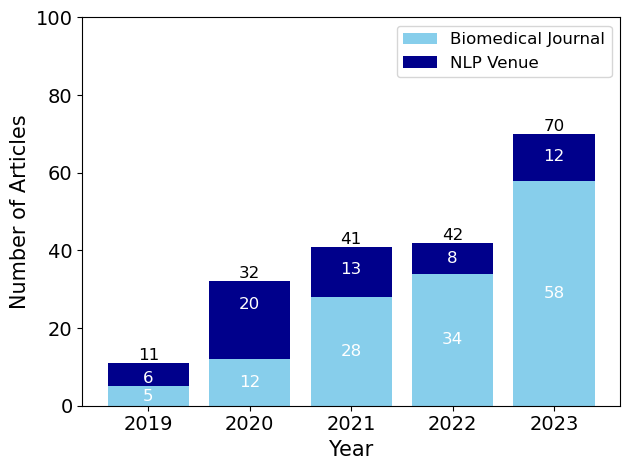

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a larger figure
plt.figure(figsize=(10, 8))

# Group by year and publication type, then count the occurrences
counts = df.groupby(['year', 'publication_type']).size().unstack(fill_value=0)

# Plot the stacked bar chart
bars = counts.plot(kind='bar', stacked=True, color=['skyblue', 'darkblue'], width=0.8)

# Define a threshold for label adjustment (e.g., 5)
label_threshold = 5

# Add count values as annotations for each bar
for i, year in enumerate(counts.index):
    for pub_type, count in zip(counts.columns, counts.loc[year]):
        if pub_type == "biomedical_journal":
            plt.text(i, count/2 , str(count), color='white' if count < counts.sum(axis=1).max() else 'black', ha='center', va='center', fontsize=12)
        else:
            total_count = counts.sum(axis=1)[year]
            va = 'center' if count < 10 else 'top' if count >= label_threshold else 'bottom'
            plt.text(i, total_count - 4, str(count), color='white' if count < counts.sum(axis=1).max() else 'black', ha='center', va=va, fontsize=12)

# Add total count values on top of each bar
for i, total_count in enumerate(counts.sum(axis=1)):
    plt.text(i, total_count, str(total_count), color='black', ha='center', va='bottom', fontsize=12)
    
# Set the y-axis limit to ensure it reaches up to 45
plt.ylim(0, 100)

# Customize the plot
plt.xticks(range(len(counts.index)), counts.index, rotation=360, fontsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Number of Articles', fontsize=15)
#plt.title('Number Articles Over Publication Year', fontsize=16)
plt.legend(['Biomedical Journal', 'NLP Venue'], fontsize=12)

plt.tight_layout()
plt.savefig('viz/years_count_stacked_with_labels_2024.pdf')
# Display the chart
plt.show()


In [81]:
top_10_categories

,journal,publication_type,count
1,ACL/ Findings,nlp_venue,32
11,BMC Bioinformatics,biomedical_journal,16
41,Journal of Biomedical Informatics,biomedical_journal,15
28,EMNLP,nlp_venue,13
18,Bioinformatics,biomedical_journal,9
2,ACL/ NLP-COVID19,nlp_venue,7
70,medRxiv,biomedical_journal,5
69,bioRxiv,biomedical_journal,5
12,BMC Medical Informatics &\nDecision Making,biomedical_journal,5
27,Database: The Journal of\nBiological Databases...,biomedical_journal,4


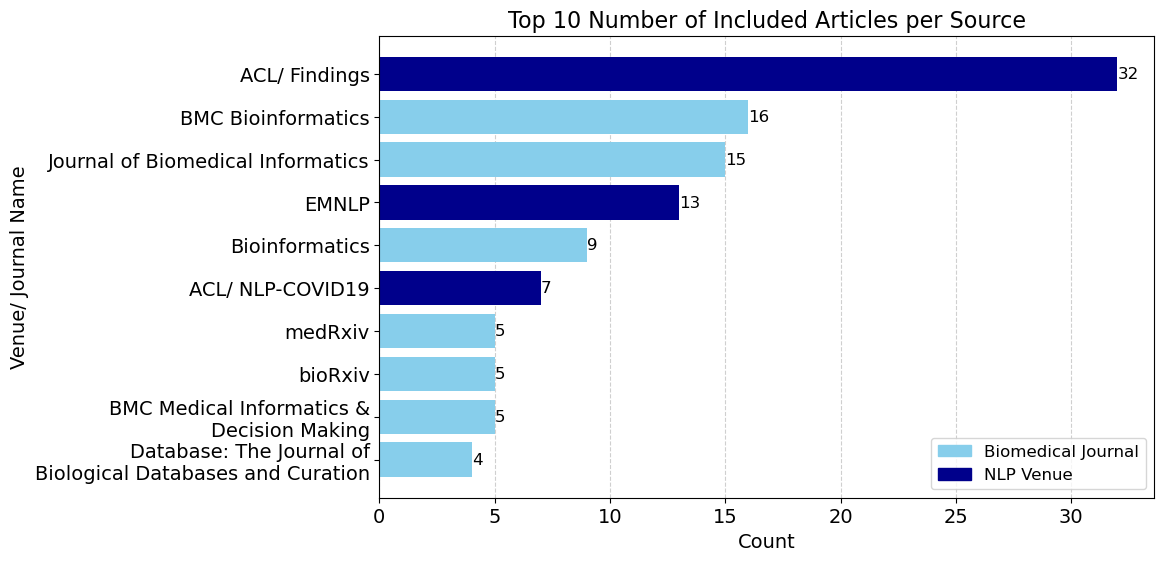

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Assuming df is your DataFrame

# Count the frequency of each category
category_counts = df.groupby(['journal', 'publication_type']).size()

# Modify the value with "\n" added
category_counts = category_counts.rename("count")
category_counts = category_counts.reset_index()
category_counts['journal'] = category_counts['journal'].replace({
    "Database: The Journal of Biological Databases and Curation": "Database: The Journal of\nBiological Databases and Curation",
    "BMC Medical Informatics & Decision Making": "BMC Medical Informatics &\nDecision Making",
    "Association for Computational Linguistics/ Findings": "ACL/ Findings",
    "Association for Computational Linguistics/ BioNLP": "ACL/ BioNLP",
    "Association for Computational Linguistics/ NLP-COVID19": "ACL/ NLP-COVID19",
    "AMIA Summits on Translational Science Proceedings": "AMIA Summits on Translational\nScience Proceedings",
    "AMIA ... Annual Symposium Proceedings/AMIA Symposium":"AMIA Symposium"
})

# Get the top 10 categories and sort in descending order
top_10_categories = category_counts.groupby(['journal', 'publication_type'])['count'].sum().reset_index()
top_10_categories = top_10_categories.sort_values(by='count', ascending=False).head(10)

# Transpose the DataFrame
top_10_categories = pd.DataFrame(top_10_categories)

# Assign colors based on the publication type
colors = ['skyblue' if pub_type == 'biomedical_journal' else 'darkblue' for pub_type in top_10_categories['publication_type']]

# Reverse the order of colors to correspond with reversed bars
colors = colors[::-1]

# Create a larger figure
plt.figure(figsize=(10, 6))

# Create a horizontal bar chart with different colors for each publication type
bar_plot = plt.barh(top_10_categories['journal'][::-1], top_10_categories['count'][::-1], color=colors, zorder=2)

# Add labels and title
plt.xlabel('Count', fontsize=14)
plt.ylabel('Venue/ Journal Name', fontsize=14)
plt.title('Top 10 Number of Included Articles per Source', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add count values as annotations
for bar, count in zip(bar_plot, top_10_categories['count'][::-1]):
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, str(count), va='center', fontsize=12)

# Add horizontal grid lines for better readability
plt.grid(axis='x', linestyle='--', alpha=0.6, zorder=1)

# Create legend handles for each category and place it outside the plot
legend_handles = [Patch(color='skyblue', label='Biomedical Journal'), Patch(color='darkblue', label='NLP Venue')]
plt.legend(handles=legend_handles, fontsize=12, loc='lower right')

plt.tick_params(axis='y', labelsize=14)
plt.tick_params(axis='x', labelsize=14)

# Save the plot to a local folder
plt.savefig('viz/top_10_journals_count_2024.pdf', bbox_inches='tight')

# Display the chart
plt.show()


In [85]:
top_10_categories

,journal,publication_type,count
1,ACL/ Findings,nlp_venue,32
11,BMC Bioinformatics,biomedical_journal,16
41,Journal of Biomedical Informatics,biomedical_journal,15
28,EMNLP,nlp_venue,13
18,Bioinformatics,biomedical_journal,9
2,ACL/ NLP-COVID19,nlp_venue,7
70,medRxiv,biomedical_journal,5
69,bioRxiv,biomedical_journal,5
12,BMC Medical Informatics &\nDecision Making,biomedical_journal,5
27,Database: The Journal of\nBiological Databases...,biomedical_journal,4


## Target DB and Data Type

In [88]:
df = pd.concat([df_initial, df_2024_included], ignore_index=True)
df['year'] = df['year'].astype(int)
# Replace semicolons with commas in the 'Target database' column
df['Target database'] = df['Target database'].str.replace(';', ',', regex=False)

df.head(2)

,author,doi,Link to paper,title,journal,year,Extracted by,Included,Reason for exclusion,Target application,...,ST,m1,c5,c2,c1,OP,publication_type,Unnamed: 40,Data availability,Unnamed: 33
0,"Abdelkader, W. and Navarro, T. and Parrish, R....",10.2196/29398,https://doi.org/10.2196/29398,A Deep Learning Approach to Refine the Identif...,JMIR Research Protocols,2021,BVI,1,NaN,Text Classification,...,A Deep Learning Approach to Refine the Identif...,NaN,NaN,NaN,NaN,NaN,biomedical_journal,NaN,NaN,NaN
1,"Alachram, H. and Chereda, H. and Beisbarth, T....",10.1371/journal.pone.0258623,https://doi.org/10.1371/journal.pone.0258623,Text mining-based word representations for bio...,PLoS ONE [Electronic Resource],2021,BVI,1,NaN,Information Extraction,...,Text mining-based word representations for bio...,NaN,NaN,NaN,NaN,NaN,biomedical_journal,NaN,NaN,NaN


In [90]:
df.shape

(196, 74)

In [92]:
df['Target database'] = df['Target database'].replace("PubMed articles (also financial, lifestyle, recreation, technology, writing and science data)", "PubMed")

# Create a new column to store the flattened data types
df['Flattened_Data_Types'] = df['Target database'].str.split(', ')

# Explode the flattened data types into separate rows
df_exploded = df.explode('Flattened_Data_Types')

# Replace "PubMed articles" with "PubMed"
df_exploded['Flattened_Data_Types'] = df_exploded['Flattened_Data_Types'].replace("PubMed articles", "PubMed/ MEDLINE")
df_exploded['Flattened_Data_Types'] = df_exploded['Flattened_Data_Types'].replace("Pubmed", "PubMed/ MEDLINE")
df_exploded['Flattened_Data_Types'] = df_exploded['Flattened_Data_Types'].replace("PubMed", "PubMed/ MEDLINE")
df_exploded['Flattened_Data_Types'] = df_exploded['Flattened_Data_Types'].replace("MEDLINE", "PubMed/ MEDLINE")
df_exploded['Flattened_Data_Types'] = df_exploded['Flattened_Data_Types'].replace("MedLine", "PubMed/ MEDLINE")
df_exploded['Flattened_Data_Types'] = df_exploded['Flattened_Data_Types'].replace("Embase", "PubMed/ MEDLINE")

df_exploded['Flattened_Data_Types'] = df_exploded['Flattened_Data_Types'].replace("DrugBank database", "DrugBank")
df_exploded['Flattened_Data_Types'] = df_exploded['Flattened_Data_Types'].replace("Drugbank", "EMBASE")

df_exploded['Flattened_Data_Types'] = df_exploded['Flattened_Data_Types'].replace("MedRxiv", "medRxiv")
df_exploded['Flattened_Data_Types'] = df_exploded['Flattened_Data_Types'].replace("BioRxiv", "bioRxiv")

df_exploded['Flattened_Data_Types'] = df_exploded['Flattened_Data_Types'].replace("EuropePMC", "Europe PMC")
df_exploded['Flattened_Data_Types'] = df_exploded['Flattened_Data_Types'].replace("CINAHL (Ebsco)", "CINAHL")

# Replace "electronic health records" and "Electronic Health Records" with "Clinical texts"
df_exploded['Flattened_Data_Types'] = df_exploded['Flattened_Data_Types'].replace(["clinical notes", "electronic health records", "Electronic Health Records"], "Clinical texts")

# Count the frequency of each data type
data_source_counts = df_exploded['Flattened_Data_Types'].value_counts()

# Print the frequency counts
# Adjust the maximum display options to show the full list
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Print the full list of data type counts
print(data_source_counts)

Flattened_Data_Types
PubMed/ MEDLINE                                                 131
Clinical texts                                                   41
Social media                                                     16
CORD-19                                                          10
DrugBank                                                          7
EMBASE                                                            7
Wikipedia                                                         6
Cochrane                                                          4
bioRxiv                                                           3
medRxiv                                                           3
arXiv                                                             3
Structured Product Labels (SPL)                                   3
ClinicalTrials.gov                                                3
Web of Science                                                    3
MeSH                       

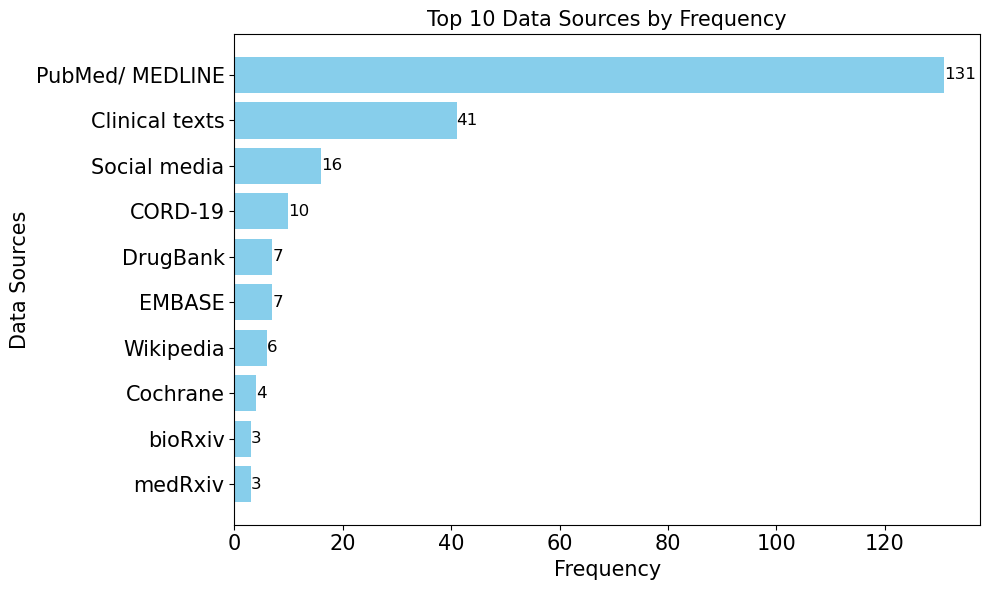

In [94]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_exploded is your DataFrame with the exploded data types and data_type_counts is the counts
# If not, you can adjust accordingly based on your DataFrame structure

# Get the top 10 data types and their counts, in descending order
top_10_data_types = data_source_counts.nlargest(10)

# Reverse the order
top_10_data_types = top_10_data_types[::-1]

# Create a horizontal bar chart for the top 10 data types
plt.figure(figsize=(10, 6))
bars = plt.barh(top_10_data_types.index, top_10_data_types, color='skyblue')

# Add labels to each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width}', va='center', fontsize=12)
    
plt.tick_params(axis='y', labelsize=15)
plt.tick_params(axis='x', labelsize=15)
plt.xlabel('Frequency', fontsize=15)
plt.ylabel('Data Sources', fontsize=15)
plt.title('Top 10 Data Sources by Frequency', fontsize=15)
plt.tight_layout()

# Save the plot to a local folder
plt.savefig('viz/top_10_data_types_frequency_2024.png')

# Display the chart
plt.show()


In [96]:
10/sum(top_10_data_types)

0.043859649122807015

In [98]:
df = pd.concat([df_initial, df_2024_included], ignore_index=True)
df['year'] = df['year'].astype(int)
df['Data type'] = df['Data type'].str.replace(';', ',', regex=False)

#df.head(2)

In [100]:
# Create a new column to store the flattened data types
df['Flattened_Data_Types'] = df['Data type'].str.split(', ')

# Explode the flattened data types into separate rows
df_exploded = df.explode('Flattened_Data_Types')
df_exploded['Flattened_Data_Types'] = df_exploded['Flattened_Data_Types'].str.title()
df_exploded['Flattened_Data_Types'] = df_exploded['Flattened_Data_Types'].replace("Abstract", "Abstracts")
df_exploded['Flattened_Data_Types'] = df_exploded['Flattened_Data_Types'].replace("Abstract", "Abstracts")
df_exploded['Flattened_Data_Types'] = df_exploded['Flattened_Data_Types'].replace("Full-Texts", "Full-Text")
df_exploded['Flattened_Data_Types'] = df_exploded['Flattened_Data_Types'].replace("Discharge Summaries", "Patient Discharge Summaries")
df_exploded['Flattened_Data_Types'] = df_exploded['Flattened_Data_Types'].replace("Freetext Radiology Reports", "Free-Text Radiology Reports")
df_exploded['Flattened_Data_Types'] = df_exploded['Flattened_Data_Types'].replace("Free-Text Radiology Reports", "Radiology Reports",)

# Count the frequency of each data type
data_type_counts = df_exploded['Flattened_Data_Types'].value_counts()

# Print the frequency counts
# Adjust the maximum display options to show the full list
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Print the full list of data type counts
print(data_type_counts)

Flattened_Data_Types
Abstracts                                                                                 115
Full-Text                                                                                  49
Clinical Notes                                                                             17
Patient Discharge Summaries                                                                12
Electronic Health Records                                                                   9
Title                                                                                       9
Systematic Reviews                                                                          7
Twitter                                                                                     6
Drug Labels                                                                                 4
Patient Recording Transcriptions                                                            4
Wiki Articles                          

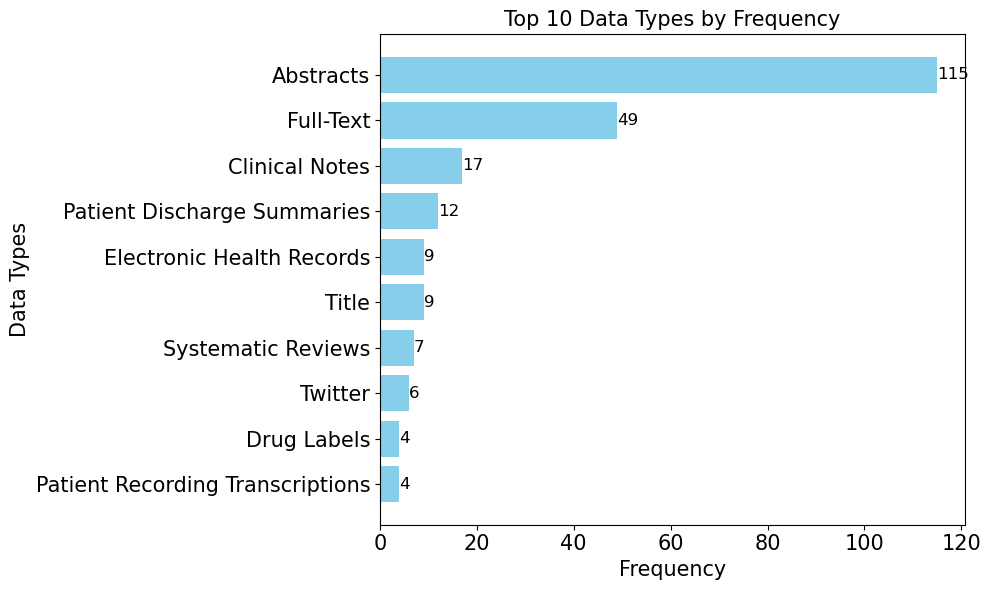

In [102]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_exploded is your DataFrame with the exploded data types and data_type_counts is the counts
# If not, you can adjust accordingly based on your DataFrame structure

# Get the top 10 data types and their counts, in descending order
top_10_data_types = data_type_counts.nlargest(10)

# Reverse the order
top_10_data_types = top_10_data_types[::-1]

# Create a horizontal bar chart for the top 10 data types
plt.figure(figsize=(10, 6))
bars = plt.barh(top_10_data_types.index, top_10_data_types, color='skyblue')

# Add labels to each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width}', va='center', fontsize=12)
    
plt.tick_params(axis='y', labelsize=15)
plt.tick_params(axis='x', labelsize=15)
plt.xlabel('Frequency', fontsize=15)
plt.ylabel('Data Types', fontsize=15)
plt.title('Top 10 Data Types by Frequency', fontsize=15)
plt.tight_layout()

# Save the plot to a local folder
plt.savefig('viz/top_10_data_types_details_frequency_2024.png')

# Display the chart
plt.show()


In [104]:
17/sum(top_10_data_types)

0.07327586206896551

### combined

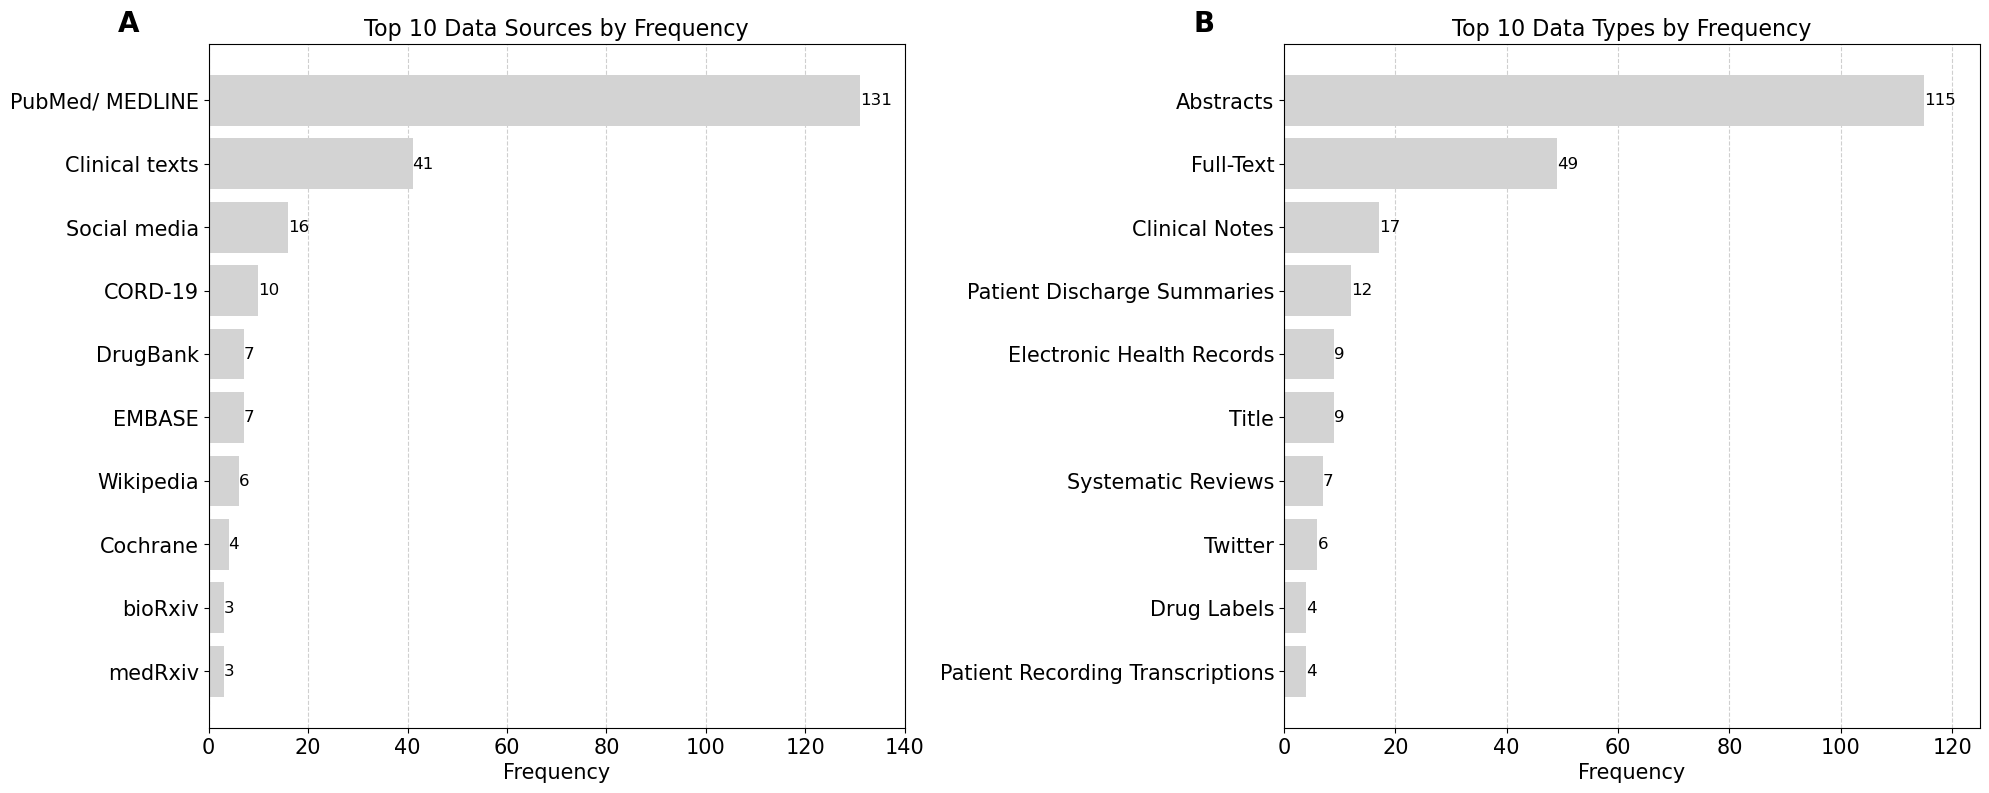

In [107]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_exploded is your DataFrame with the exploded data types and data_type_counts is the counts
# If not, you can adjust accordingly based on your DataFrame structure

# Get the top 10 data sources and their counts, in descending order
# This assumes you have a similar way to calculate top data sources as for data types
# Adjust this part according to your data source counts calculation
top_10_data_sources = data_source_counts.nlargest(10)

# Reverse the order for plotting
#top_10_data_types = top_10_data_types[::-1]
top_10_data_sources = top_10_data_sources[::-1]

# Create a larger figure to hold both subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

# FIRST plot - Top 10 Data Sources by Frequency
bars = axes[0].barh(top_10_data_sources.index, top_10_data_sources, color='lightgrey',zorder=2)
# Add labels to each bar
for bar in bars:
    width = bar.get_width()
    axes[0].text(width, bar.get_y() + bar.get_height() / 2, f'{width}', va='center', fontsize=12)
    
axes[0].text(-0.1, 1.05, 'A', transform=axes[0].transAxes, fontsize=20, fontweight='bold', va='top', ha='right')
axes[0].tick_params(axis='y', labelsize=15)
axes[0].tick_params(axis='x', labelsize=15)
axes[0].set_xlabel('Frequency', fontsize=15)
#axes[0].set_ylabel('Data Sources', fontsize=15)
axes[0].set_title('Top 10 Data Sources by Frequency', fontsize=16)
axes[0].set_xlim(0, 140)  # Set x-axis limit up to 125
axes[0].grid(axis='x', linestyle='--', alpha=0.6, zorder=1)

# SECOND plot - Top 10 Data Types by Frequency
bars = axes[1].barh(top_10_data_types.index, top_10_data_types, color='lightgrey',zorder=2)
# Add labels to each bar
for bar in bars:
    width = bar.get_width()
    axes[1].text(width, bar.get_y() + bar.get_height() / 2, f'{width}', va='center', fontsize=12)

axes[1].text(-0.1, 1.05, 'B', transform=axes[1].transAxes, fontsize=20, fontweight='bold', va='top', ha='right')
axes[1].tick_params(axis='y', labelsize=15)
axes[1].tick_params(axis='x', labelsize=15)
axes[1].set_xlabel('Frequency', fontsize=15)
#axes[1].set_ylabel('Data Types', fontsize=15)
axes[1].set_title('Top 10 Data Types by Frequency', fontsize=16)
axes[1].set_xlim(0, 125)  # Set x-axis limit up to 125
axes[1].grid(axis='x', linestyle='--', alpha=0.6, zorder=1)

plt.tight_layout()
# Save the combined plot to a local folder
plt.savefig('viz/top_10_data_types_and_sources_frequency_2024.pdf')
# Display the combined chart
plt.show()

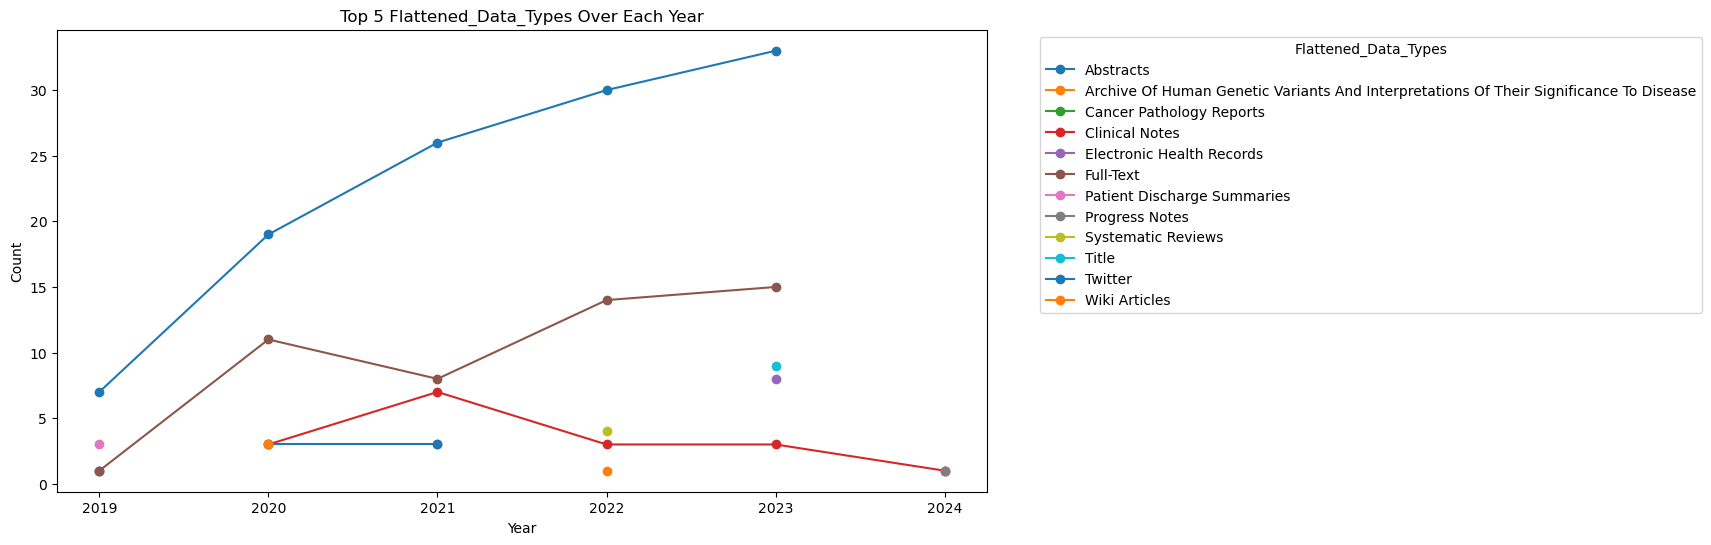

In [108]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame df_exploded
# Group by 'year' and count the occurrences of each 'Flattened_Data_Types' value
grouped = df_exploded.groupby(['year', 'Flattened_Data_Types']).size().reset_index(name='count')

# Sort the data by year and count in descending order
grouped = grouped.sort_values(by=['year', 'count'], ascending=[True, False])

# Get the top 5 most frequent values for each year
top5_values = grouped.groupby('year').head(5)

# Create a pivot table to make it easier for plotting
pivot_table = top5_values.pivot(index='year', columns='Flattened_Data_Types', values='count')

# Plot the data in a line chart
pivot_table.plot(kind='line', marker='o', figsize=(12, 6))
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Top 5 Flattened_Data_Types Over Each Year')
plt.legend(title='Flattened_Data_Types', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


## Fine-tuning corpus data/task

In [112]:
df = pd.concat([df_initial, df_2024_included], ignore_index=True)
df['year'] = df['year'].astype(int)

df.head(2)

,author,doi,Link to paper,title,journal,year,Extracted by,Included,Reason for exclusion,Target application,Domain of automated approach,Target database,Data type,Data filter applied,Hosted Application for End-users,Alternative Approach,LLM Model,Models/Resources used with LLM,System Architecture/ Flow,Programming language,Library/Framework,Library/Framework Harmonized,Reported performance metrics,Reported performance metrics Harmonized,Source code availability,Source code link,Data used availability,Preprocessing applied,Pretraining corpus origin,Pretraining corpus size,Fine-tuning corpus data/task,New annotations,Annotations type,New dataset developed,Fine-tuning corpus size,Number of tasks/datasets for performance evaluation,Hardware used for training/validation/fine-tuning,Hardware type,Internal validity 1,Internal validity 2,External validity,External validity.1,Comment,Unnamed: 43,url,label,type,abstract,address,accession,Link,issue,keywords,language,issn,pages,volume,DA,DB,DP,ID,j2,m3,n1,ST,m1,c5,c2,c1,OP,publication_type,Unnamed: 40,Data availability,Unnamed: 33
0,"Abdelkader, W. and Navarro, T. and Parrish, R....",10.2196/29398,https://doi.org/10.2196/29398,A Deep Learning Approach to Refine the Identif...,JMIR Research Protocols,2021,BVI,1,NaN,Text Classification,Literature Screening/ Methodological Quality: ...,PubMed,Abstracts,NaN,no,NaN,"BERT, BioBERT, BlueBERT, PubMedBERT",NaN,BERT architecture,Python,HuggingFace,HuggingFace,"F1, recall, specificity, accuracy, precision, ...","F1-Score, Recall, Specificity, Accuracy, Preci...",no,NaN,partially,NaN,depends on BERT model,depends on BERT model,Custom-annotated PubMed data,"Article type: original study, systematic revie...",NaN,yes,"Total 2012–2020, N=160 712 (positive 29810 and...",1,"8 Intel Silver 4216 Cascade Lake CPU cores, an...","GPU, CPU",Yes,No,No,NaN,Protocol!,NaN,https://ovidsp.ovid.com/ovidweb.cgi?T=JS&CSC=Y...,Abdelkader_2021_JMIRReseProt,JOUR,BACKGROUND: A barrier to practicing evidence-b...,"Abdelkader, Wael. Health Information Research ...",34847061.0,NaN,11,NaN,English,1929-0748,e29398,10,2023-11-29 00:00:00,MEDLINE,Ovid Technologies,15.0,JMIR Res Protoc,NaN,"Abdelkader, Wael Navarro, Tamara Parrish, Rick...",A Deep Learning Approach to Refine the Identif...,NaN,NaN,NaN,NaN,NaN,biomedical_journal,NaN,NaN,NaN
1,"Alachram, H. and Chereda, H. and Beisbarth, T....",10.1371/journal.pone.0258623,https://doi.org/10.1371/journal.pone.0258623,Text mining-based word representations for bio...,PLoS ONE [Electronic Resource],2021,BVI,1,NaN,Information Extraction,General biomedical text mining/ Genomics: Extr...,"PubMed, Gene Expression Omnibus repository","Abstracts, Functional Genomics",NaN,yes: https://ebiomecon.genexplain.com/,NaN,BioBERT,Graph-CNN based on Human Protein Reference Dat...,BERT architecture,Python,PyTorch,PyTorch,"AUC, Accuracy, F1, similarity threshold","AUC, Accuracy, F1-Score, Similarity Threshold",no,NaN,NaN,for word2vec training: The first phase applied...,for word2vec PubMed FTP repository,"16,558,093 article abstracts",HPRD PPI; Custom-annotated from GEO series,genomic predictors of response and survival in...,NaN,yes,10 microarray datasets measured on Affymetrix ...,"4 (lung cancer, liver cancer, prostate cancer,...",NaN,NaN,Yes,No,yes,word2vec,NaN,NaN,https://ovidsp.ovid.com/ovidweb.cgi?T=JS&CSC=Y...,Alachram_2021_PLoONE.ElRes,JOUR,Biomedical and life science literature is an e...,"Alachram, Halima. Department of Medical Bioinf...",34653224.0,NaN,10,Algorithms and *Breast Neoplasms/ge [Genetics]...,English,1932-6203,e0258623,16,NaN,MEDLINE,Ovid Technologies,101.0,PLoS ONE,"Research Support, Non-U.S. Gov't","Alachram, Halima Chereda, Hryhorii Beisbarth, ...",Text mining-based word representations for bio...,NaN,NaN,NaN,NaN,NaN,biomedical_journal,NaN,NaN,NaN


In [114]:
#df = df_2024_included.copy()

In [116]:
# Create a new column to store the flattened data types
df['Fine-tuning corpus data/task'] = df['Fine-tuning corpus data/task'].str.replace(',', ';', regex=False)
df['Flattened_Data_Types'] = df['Fine-tuning corpus data/task'].str.split('; ?')

# Explode the flattened data types into separate rows
df_exploded = df.explode('Flattened_Data_Types')
df_exploded['Flattened_Data_Types'] = df_exploded['Flattened_Data_Types'].str.strip()
df_exploded['Flattened_Data_Types'] = df_exploded['Flattened_Data_Types'].str.replace(r"BC5CDR-Dis", "BC5CDR-disease", regex=True)
df_exploded['Flattened_Data_Types'] = df_exploded['Flattened_Data_Types'].str.replace(r"BC5CDR-Chem", "BC5CDR-chem", regex=True)
df_exploded['Flattened_Data_Types'] = df_exploded['Flattened_Data_Types'].str.replace(r"ChemProt", "CHEMPROT", regex=True)
df_exploded['Flattened_Data_Types'] = df_exploded['Flattened_Data_Types'].str.replace(r"NCBI-Dis", "NCBI-disease", regex=True)
df_exploded['Flattened_Data_Types'] = df_exploded['Flattened_Data_Types'].str.replace(r"NCBI-diseaseease", "NCBI-disease", regex=True)
df_exploded['Flattened_Data_Types'] = df_exploded['Flattened_Data_Types'].str.replace(r"TREC-Covid", "TREC-COVID", regex=True)
df_exploded['Flattened_Data_Types'] = df_exploded['Flattened_Data_Types'].str.replace(r"HOC dataset", "HoC", regex=True)
df_exploded['Flattened_Data_Types'] = df_exploded['Flattened_Data_Types'].str.replace(r"SCIERC", "SciERC", regex=True)
df_exploded['Flattened_Data_Types'] = df_exploded['Flattened_Data_Types'].str.replace(r"GAD-10", "GAD", regex=True)
df_exploded['Flattened_Data_Types'] = df_exploded['Flattened_Data_Types'].str.replace(r"AGAC corpus", "AGAC", regex=True)
df_exploded['Flattened_Data_Types'] = df_exploded['Flattened_Data_Types'].str.replace(r"BioCreative-LitCovid", "LitCovid", regex=True)
df_exploded['Flattened_Data_Types'] = df_exploded['Flattened_Data_Types'].str.replace(r"Genia Event 2013", "GENIA Event 2013", regex=True)
df_exploded['Flattened_Data_Types'] = df_exploded['Flattened_Data_Types'].str.replace(r"THYME(?! Clinical Notes)", "THYME Clinical Notes", regex=True)
df_exploded['Flattened_Data_Types'] = df_exploded['Flattened_Data_Types'].str.replace(r"ChemDNER", "CHEMDNER", regex=True)
df_exploded['Flattened_Data_Types'] = df_exploded['Flattened_Data_Types'].str.replace(r"DementiaBank English Pitt Corpus", "DementiaBank Pitt Corpus", regex=True)
df_exploded['Flattened_Data_Types'] = df_exploded['Flattened_Data_Types'].str.replace(r"DrugBank DB", "DrugBank", regex=True)


# Convert the Flattened_Data_Types column to strings
df_exploded['Flattened_Data_Types'] = df_exploded['Flattened_Data_Types'].astype(str)

# Filter out rows containing 'custom' or 'self' in the Flattened_Data_Types column
df_exploded = df_exploded[~df_exploded['Flattened_Data_Types'].str.contains(r'custom|self', case=False)]


#df_exploded['Flattened_Data_Types'] = df_exploded['Flattened_Data_Types'].str.replace(r"BC5CDR.*", "BC5CDR", regex=True)


# Count the frequency of each data type
data_type_counts = df_exploded['Flattened_Data_Types'].value_counts()

# Print the frequency counts
# Adjust the maximum display options to show the full list
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Print the full list of data type counts
data_type_counts

Flattened_Data_Types
NCBI-disease                                                                                                                         21
BC5CDR-disease                                                                                                                       14
BC2GM                                                                                                                                13
BC5CDR-chem                                                                                                                          12
CHEMPROT                                                                                                                             10
DDIExtractions 2013                                                                                                                  10
JNLPBA                                                                                                                                9
BC5CDR                     

### Custom Datasets

In [119]:
df = pd.concat([df_initial, df_2024_included], ignore_index=True)
df['Fine-tuning corpus data/task'] = df['Fine-tuning corpus data/task'].str.replace(',', ';', regex=False)
df['Flattened_Data_Types'] = df['Fine-tuning corpus data/task'].str.split('; ?')
df_exploded = df.explode('Flattened_Data_Types')
df_exploded['Flattened_Data_Types'] = df_exploded['Flattened_Data_Types'].astype(str)


In [121]:
df_exploded.head()

,author,doi,Link to paper,title,journal,year,Extracted by,Included,Reason for exclusion,Target application,Domain of automated approach,Target database,Data type,Data filter applied,Hosted Application for End-users,Alternative Approach,LLM Model,Models/Resources used with LLM,System Architecture/ Flow,Programming language,Library/Framework,Library/Framework Harmonized,Reported performance metrics,Reported performance metrics Harmonized,Source code availability,Source code link,Data used availability,Preprocessing applied,Pretraining corpus origin,Pretraining corpus size,Fine-tuning corpus data/task,New annotations,Annotations type,New dataset developed,Fine-tuning corpus size,Number of tasks/datasets for performance evaluation,Hardware used for training/validation/fine-tuning,Hardware type,Internal validity 1,Internal validity 2,External validity,External validity.1,Comment,Unnamed: 43,url,label,type,abstract,address,accession,Link,issue,keywords,language,issn,pages,volume,DA,DB,DP,ID,j2,m3,n1,ST,m1,c5,c2,c1,OP,publication_type,Unnamed: 40,Data availability,Unnamed: 33,Flattened_Data_Types
0,"Abdelkader, W. and Navarro, T. and Parrish, R....",10.2196/29398,https://doi.org/10.2196/29398,A Deep Learning Approach to Refine the Identif...,JMIR Research Protocols,2021.0,BVI,1,NaN,Text Classification,Literature Screening/ Methodological Quality: ...,PubMed,Abstracts,NaN,no,NaN,"BERT, BioBERT, BlueBERT, PubMedBERT",NaN,BERT architecture,Python,HuggingFace,HuggingFace,"F1, recall, specificity, accuracy, precision, ...","F1-Score, Recall, Specificity, Accuracy, Preci...",no,NaN,partially,NaN,depends on BERT model,depends on BERT model,Custom-annotated PubMed data,"Article type: original study, systematic revie...",NaN,yes,"Total 2012–2020, N=160 712 (positive 29810 and...",1,"8 Intel Silver 4216 Cascade Lake CPU cores, an...","GPU, CPU",Yes,No,No,NaN,Protocol!,NaN,https://ovidsp.ovid.com/ovidweb.cgi?T=JS&CSC=Y...,Abdelkader_2021_JMIRReseProt,JOUR,BACKGROUND: A barrier to practicing evidence-b...,"Abdelkader, Wael. Health Information Research ...",34847061.0,NaN,11,NaN,English,1929-0748,e29398,10,2023-11-29 00:00:00,MEDLINE,Ovid Technologies,15.0,JMIR Res Protoc,NaN,"Abdelkader, Wael Navarro, Tamara Parrish, Rick...",A Deep Learning Approach to Refine the Identif...,NaN,NaN,NaN,NaN,NaN,biomedical_journal,NaN,NaN,NaN,Custom-annotated PubMed data
1,"Alachram, H. and Chereda, H. and Beisbarth, T....",10.1371/journal.pone.0258623,https://doi.org/10.1371/journal.pone.0258623,Text mining-based word representations for bio...,PLoS ONE [Electronic Resource],2021.0,BVI,1,NaN,Information Extraction,General biomedical text mining/ Genomics: Extr...,"PubMed, Gene Expression Omnibus repository","Abstracts, Functional Genomics",NaN,yes: https://ebiomecon.genexplain.com/,NaN,BioBERT,Graph-CNN based on Human Protein Reference Dat...,BERT architecture,Python,PyTorch,PyTorch,"AUC, Accuracy, F1, similarity threshold","AUC, Accuracy, F1-Score, Similarity Threshold",no,NaN,NaN,for word2vec training: The first phase applied...,for word2vec PubMed FTP repository,"16,558,093 article abstracts",HPRD PPI; Custom-annotated from GEO series,genomic predictors of response and survival in...,NaN,yes,10 microarray datasets measured on Affymetrix ...,"4 (lung cancer, liver cancer, prostate cancer,...",NaN,NaN,Yes,No,yes,word2vec,NaN,NaN,https://ovidsp.ovid.com/ovidweb.cgi?T=JS&CSC=Y...,Alachram_2021_PLoONE.ElRes,JOUR,Biomedical and life science literature is an e...,"Alachram, Halima. Department of Medical Bioinf...",34653224.0,NaN,10,Algorithms and *Breast Neoplasms/ge [Genetics]...,English,1932-6203,e0258623,16,NaN,MEDLINE,Ovid Technologies,101.0,PLoS ONE,"Research Support, Non-U.S. Gov't","Alachram, Halima Chereda, Hryhorii Beisbarth, ...",Text mining-based word representations for bio...,NaN,NaN,NaN,NaN,NaN,biomedical_journal,NaN,NaN,NaN,HPRD PPI
1,"Alachram, H. and Chereda, H. and Beisbarth, T....",10.1371/journal.pone.0258623,https://doi.org/10.1371/journal.pone.

In [123]:
selected_rows = df_exploded[df_exploded["Flattened_Data_Types"].str.contains("custom|self", case=False, na=False)]
custom_datasets = selected_rows[['title', 'Domain of automated approach', 'journal', 'Data type', 'Target application', 'year', 'Data used availability', 'Flattened_Data_Types', 'publication_type', 'New annotations']]
#custom_datasets[['Biomedical Domain', 'Domain Details']] = custom_datasets['Domain of automated approach'].str.split(':', 1, expand=True)
#df[['Biomedical Domain', 'Domain Details']] = df['Domain of automated approach'].str.split(':', 1, expand=True)

#custom_datasets[['Biomedical Domain Main', 'Biomedical Domain Additional']] = custom_datasets['Biomedical Domain'].str.split('/', 1, expand=True)
selected_rows.shape, custom_datasets.shape

((80, 75), (80, 10))

In [125]:
custom_datasets_classification = custom_datasets[custom_datasets["Target application"].str.contains("classification", case=False, na=False)]
custom_datasets_classification.sort_values(by="Flattened_Data_Types")

,title,Domain of automated approach,journal,Data type,Target application,year,Data used availability,Flattened_Data_Types,publication_type,New annotations
103,A context-based framework for modeling the rol...,Biomedical Literature Curation: categorizing t...,EMNLP,Abstracts,Text Classification,2019.0,yes,Custom-annotated ARC,nlp_venue,full-text annotations for the resource role ty...
74,Automating Quality Assessment of Medical Evide...,Evidence-Based Medicine/ Research Quality Appr...,Journal of Medical Internet Research,Systematic Reviews,Text Classification,2023.0,yes,Custom-annotated Cochrane Reviews,biomedical_journal,"quality of evidence (RoB, imprecision, inconsi..."
102,CORA: A Deep Active Learning Covid-19 Relevanc...,Biomedical Literature Curation/ Covid-19: dist...,Association for Computational Linguistics/ NLP...,"Abstracts, Full-text",Text Classification,2020.0,yes,Custom-annotated Elsevier data,nlp_venue,relevance annotation for the reserch question ...
38,Bat4RCT: A suite of benchmark data and baselin...,Biomedical Literature Curation/ RCT Articles: ...,PLoS ONE [Electronic Resource],Abstracts,Text Classification,2023.0,yes,Custom-annotated MEDLINE articles,biomedical_journal,RCT - yes or no
0,A Deep Learning Approach to Refine the Identif...,Literature Screening/ Methodological Quality: ...,JMIR Research Protocols,Abstracts,Text Classification,2021.0,partially,Custom-annotated PubMed data,biomedical_journal,"Article type: original study, systematic revie..."
77,"Clinical study type classification, validation...",Literature Screening/ Study Type/ Biomedical L...,medRxiv,Abstracts,Text Classification,2022.0,no,Custom-annotated PubMed data,biomedical_journal,Abstracts were assigned one of the following s...
109,Detecting causal language use in science findings,Evidence-Based Medicine: prediction model to a...,EMNLP,Abstracts,Text Classification,2019.0,yes,Custom-annotated PubMed data,nlp_venue,annotated sentence with on of the casual relat...
21,An automated approach to identify scientific p...,Pharma/ Pharmacokinetics: Providing a centrali...,Wellcome Open Research,Abstracts,Text Classification,2021.0,yes,Custom-annotated PubMed data,biomedical_journal,Pharmacokinetics - papers that contain in vivo...
12,The Classification of Short Scientific Texts U...,Literature Screening/ Systematic Reviews/ Neur...,Studies in Health Technology & Informatics,Abstracts,Text Classification,2021.0,NaN,Custom-annotated PubMed data,biomedical_journal,Relevant or not for a systematic review in art...
54,Towards Automated Screening of Literature on A...,Literature Screening/ Systematic Reviews/ Nurs...,Studies in Health Technology & Informatics,Abstracts,Text Classification,2022.0,no,Custom-annotated abstracts from PubMed (MEDLINE),biomedical_journal,if topic is artificial intelligence in nursing...


In [127]:
custom_datasets_classification.shape

(27, 10)

In [129]:
custom_datasets['Target application'].value_counts()


Target application
Text Classification              27
Information Extraction           19
Information Retrieval             9
Named Entity Recognition          6
Knowledge Graph                   4
Entity Normalization/Linking      3
Similarity Clustering             2
Text Summarization                2
Text Generation                   2
Machine Reading Comprehension     1
Fact Verification                 1
Multi-Domain                      1
Explainable/ Fair AI              1
Relation Extraction               1
Topic Modelling                   1
Name: count, dtype: int64

In [131]:
sum(custom_datasets['Target application'].value_counts())/196

0.40816326530612246

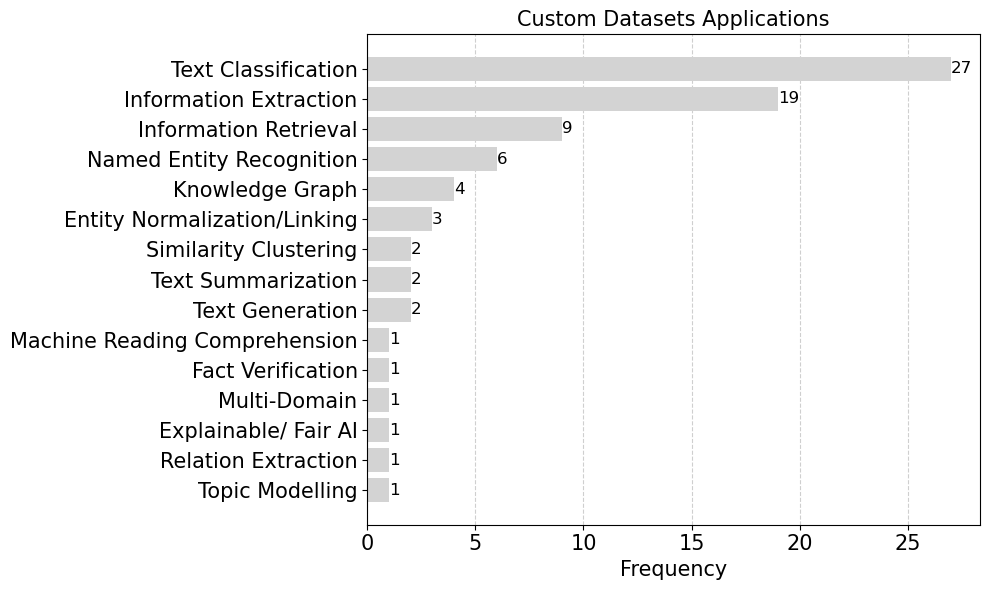

In [133]:
# Assuming df_exploded is your DataFrame with the exploded data types and data_type_counts is the counts
# If not, you can adjust accordingly based on your DataFrame structure

# Get the top 10 data types and their counts, in descending order
top_10_data_types = custom_datasets['Target application'].value_counts()

# Reverse the order
top_10_data_types = top_10_data_types[::-1]

# Create a horizontal bar chart for the top 10 data types
plt.figure(figsize=(10, 6))
bars = plt.barh(top_10_data_types.index, top_10_data_types, color='lightgrey', zorder=2)

# Add labels to each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width}', va='center', fontsize=12)
    
plt.tick_params(axis='y', labelsize=15)
plt.tick_params(axis='x', labelsize=15)
plt.xlabel('Frequency', fontsize=15)
#plt.ylabel('NLP Task', fontsize=15)
plt.grid(axis='x', linestyle='--', alpha=0.6, zorder=1)
plt.title('Custom Datasets Applications', fontsize=15)
plt.tight_layout()

# Save the plot to a local folder
plt.savefig('viz/custom_dataset_nlp_task_2024.pdf')

# Display the chart
plt.show()

In [135]:
category_counts

,journal,publication_type,count
0,ACL/ Findings,nlp_venue,8
1,AMIA Symposium,biomedical_journal,3
2,AMIA Summits on Translational\nScience Proceed...,biomedical_journal,3
3,ArXiv,biomedical_journal,1
4,Artificial Intelligence in Medicine,biomedical_journal,2
5,Artificial Intelligence in the Life Sciences,biomedical_journal,1
6,Artificial intelligence in medicine,biomedical_journal,1
7,Association for Computational Linguistics,nlp_venue,2
8,ACL/ BioNLP,nlp_venue,4
9,ACL/ Findings,nlp_venue,24


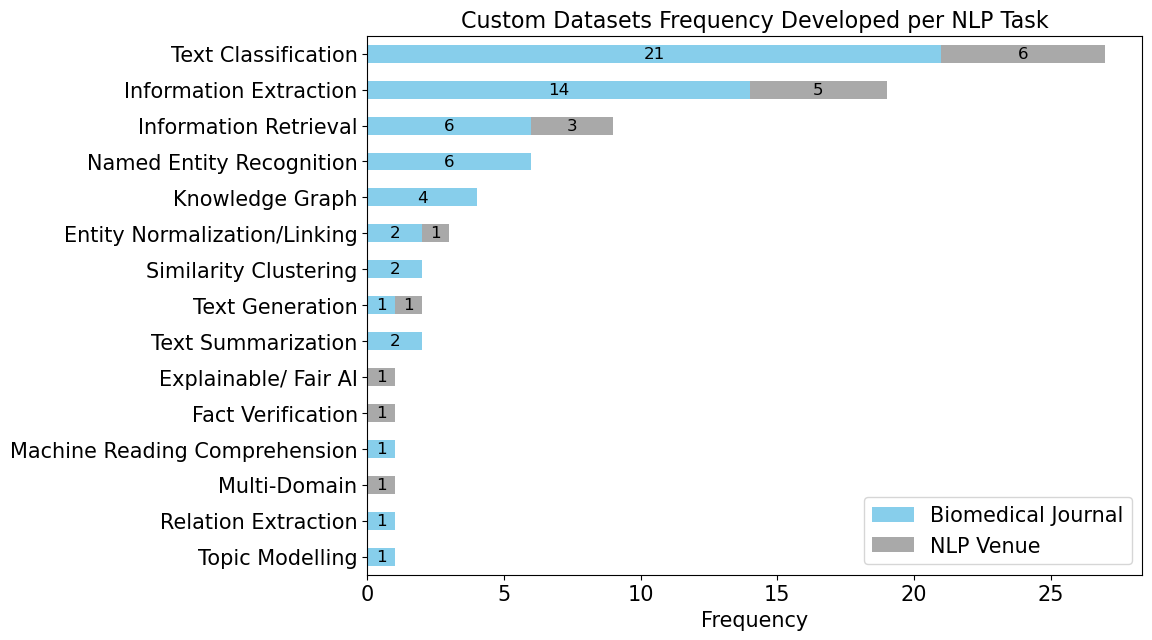

In [137]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming custom_datasets is defined and loaded
# Count the frequency of each category
category_counts = custom_datasets.groupby(['Target application', 'publication_type']).size()
category_counts = category_counts.rename("count")
category_counts = category_counts.reset_index()

# Pivot the data for a stacked bar chart
pivoted_data = category_counts.pivot(index='Target application', columns='publication_type', values='count')

# Fill NaN with 0 for stacking
pivoted_data = pivoted_data.fillna(0)

# Sort by the total count of each category
pivoted_data['total'] = pivoted_data.sum(axis=1)
pivoted_data = pivoted_data.sort_values('total', ascending=False)

# Store the sorted target application names for later use
sorted_target_applications = pivoted_data.index.tolist()

# Drop the total column used for sorting
pivoted_data = pivoted_data.drop(columns='total')

# Create a larger figure
plt.figure(figsize=(10, 7))

# Plotting stacked horizontal bars
bar_plot = pivoted_data.plot(kind='barh', stacked=True, color=['skyblue', 'darkgrey'], ax=plt.gca())

# Reverse the order of the y-axis to match the sorted categories
plt.gca().invert_yaxis()

# Add labels and title
plt.xlabel('Frequency', fontsize=15)
plt.ylabel('', fontsize=15)
plt.title('Custom Datasets Frequency Developed per NLP Task', fontsize=16)
plt.tick_params(axis='y', labelsize=15)
plt.tick_params(axis='x', labelsize=15)

# Add count values as annotations in the center of each bar segment
for i, bar in enumerate(bar_plot.containers):
    for rect in bar:
        # Calculate width and center position for the annotation
        width = rect.get_width()
        center = rect.get_x() + width / 2
        if width > 0:  # Only annotate non-zero values
            plt.text(center, rect.get_y() + rect.get_height() / 2, int(width), ha='center', va='center', color='black', fontsize=12)

# Add color legend
plt.legend(['Biomedical Journal', 'NLP Venue'], fontsize=15)

# Save and show the plot
plt.savefig('viz/custom_dataset_nlp_task_stacked_2024.pdf', bbox_inches='tight')
plt.show()


In [139]:
custom_datasets['Data type'].value_counts()


Data type
Abstracts                                                                                                                       23
Abstracts, Full-text                                                                                                             6
electronic health records                                                                                                        6
abstract                                                                                                                         6
title, abstract                                                                                                                  5
abstract, full-text                                                                                                              3
full-text                                                                                                                        3
Full-text, Systematic Reviews                                            

In [146]:
custom_datasets['publication_type'].value_counts()


publication_type
biomedical_journal    61
nlp_venue             19
Name: count, dtype: int64

In [150]:
custom_datasets['Data used availability'].value_counts()


Data used availability
yes          29
no           10
partially     3
Name: count, dtype: int64

In [152]:
len(custom_datasets_classification)

27

In [154]:
custom_datasets_retrieval = custom_datasets[custom_datasets["Target application"].str.contains("retrieval", case=False, na=False)]
custom_datasets_retrieval.sort_values(by="Flattened_Data_Types")

,title,Domain of automated approach,journal,Data type,Target application,year,Data used availability,Flattened_Data_Types,publication_type,New annotations
116,Self-supervised context-aware COVID-19 documen...,Literature-Based Discovery/ Covid-19: selfsupe...,Association for Computational Linguistics/ NLP...,"Abstracts, Full-text",Information Retrieval,2020.0,yes,Custom-annotated CORD-19 (PubMed) with SIO lin...,nlp_venue,samples consist of sentences and their\ntarget...
45,pubmedKB: an interactive web server for explor...,Literature-Based Discovery: Search engine for ...,Nucleic Acids Research,"Abstracts, Archive of human genetic variants a...",Information Retrieval,2022.0,no,Custom-annotated ClinVar abstracts,biomedical_journal,ClinVar: sentence-level triplet of (genetic Va...
45,pubmedKB: an interactive web server for explor...,Literature-Based Discovery: Search engine for ...,Nucleic Acids Research,"Abstracts, Archive of human genetic variants a...",Information Retrieval,2022.0,no,Custom-annotated DisGeNET articles,biomedical_journal,ClinVar: sentence-level triplet of (genetic Va...
9,LitCovid: an open database of COVID-19 literature,Literature-Based Discovery/ Covid-19: Informat...,Nucleic Acids Research,Abstracts,Information Retrieval,2021.0,yes,Custom-annotated PubMed data,biomedical_journal,"COVID-19 relevance, topic, geolocation and dru..."
120,Transitioning from benchmarks to a real-world ...,Literature-Based Discovery: illustrate throug...,Association for Computational Linguistics/ Fin...,Abstracts,Information Retrieval,2023.0,no,Custom-annotated PubMed data,nlp_venue,a practical use case simulating a search for V...
8,LitCovid in 2022: an information resource for ...,Literature-Based Discovery/ Covid-19: Informat...,Nucleic Acids Research,Abstracts,Information Retrieval,2023.0,yes,Custom-annotated PubMed dataset,biomedical_journal,Vaccines recognition and normalization dataset...
53,LiSA: an assisted literature search pipeline f...,Literature-Based Discovery/ Pharma/ Adverse-Dr...,BMC Medical Informatics & Decision Making,"Abstracts, Full-text, Sentences",Information Retrieval,2022.0,partially,Custom-annotated PubMed sentences,biomedical_journal,sentences labeled for three categories based o...
92,Querying across genres for medical claims in news,Media for Health Care/ Fact Checking: ﬁnd the ...,EMNLP,"Online Healthcare Information, Abstracts",Information Retrieval,2020.0,yes,Custom-annotated news-PubMed publications dataset,nlp_venue,collected claims from news paired with researc...
192,NeuroBridge: a prototype platform for discover...,Biomedical Literature Curation: NeuroBridge pr...,Frontiers in Neuroinformatics,"abstract, full-text",Information Retrieval,2023.0,NaN,Self-collected data,biomedical_journal,NaN


In [156]:
custom_datasets_extraction = custom_datasets[custom_datasets["Target application"].str.contains("extraction", case=False, na=False)]
custom_datasets_extraction.sort_values(by="Flattened_Data_Types")


,title,Domain of automated approach,journal,Data type,Target application,year,Data used availability,Flattened_Data_Types,publication_type,New annotations
170,Towards precise PICO extraction from abstracts...,Evidence-Based Medicine: Automated extraction ...,Bioinformatics,abstract,Information Extraction,2023.0,NaN,2 Self-collected dataset (COVID-19 & AD),biomedical_journal,NaN
177,Extracting social determinants of health from ...,Clinical/ Outcome Prediction: automatic method...,Journal of the American Medical Informatics As...,clinical notes,Information Extraction,2023.0,NaN,2 Custom-annotated data,biomedical_journal,NaN
105,Evidence-based fact-checking of health-related...,Media for Health Care/ Fact Checking: Evidence...,Association for Computational Linguistics/ Fin...,Abstracts,Information Extraction,2021.0,yes,Custom-annotated COVID-19 related claims Healt...,nlp_venue,claims retrieved from the web; annotated evid...
59,Understanding Clinical Trial Reports: Extracti...,Literature-Based Discovery: Clinical eveidence...,AMIA Summits on Translational Science Proceedings,Full-text,Information Extraction,2021.0,no,Custom-annotated EBM-NLP abstracts,biomedical_journal,"ICO (intervention, comparator, outcome) elemen..."
94,Fine-grained information extraction from biome...,Literature-Based Discovery: extract scientiﬁc ...,Association for Computational Linguistics,"Abstracts, Full-text",Information Extraction,2021.0,yes,Custom-annotated PubMed and PMC data,nlp_venue,covid-19 papers annotated for fine-grained ent...
35,EvidenceMap: a three-level knowledge represent...,Evidence-Based Medicine/ PICO: Automated evide...,Journal of the American Medical Informatics As...,Abstracts,Information Extraction,2023.0,yes,Custom-annotated PubMed data,biomedical_journal,PICO elements and their dependencies in RCT ar...
144,Leveraging pre-trained language models for min...,Evidence-Based Medicine: extract microbe-disea...,BMC Bioinformatics,full-text,Information Extraction,2023.0,NaN,Custom-annotated data,biomedical_journal,NaN
155,Algorithmic identification of treatment-emerge...,Pharma/ Adverse-Drug-Event: identify serious a...,medRxiv,"clinical notes, electronic health records",Information Extraction,2023.0,NaN,Custom-annotated data,biomedical_journal,NaN
167,SCREENER: Streamlined collaborative learning o...,General biomedical text mining: propose a mode...,Plos one,"abstract, full-text",Information Extraction,2023.0,NaN,Custom-annotated data,biomedical_journal,NaN
168,RelCurator: a text mining-based curation syste...,General biomedical text mining: analyzes the t...,Genes & Genomics,"title, abstract",Relation Extraction,2023.0,NaN,Custom-annotated data,biomedical_journal,NaN


In [158]:
sorted_dataframe = custom_datasets_classification.sort_values(by="Flattened_Data_Types")

# Print the complete text content of "New annotations" column for the first row
print(sorted_dataframe['New annotations'].iloc[9])


if topic is artificial intelligence in nursing - relevant, else not


In [160]:
custom_datasets['Flattened_Data_Types'].value_counts()

Flattened_Data_Types
Self-collected data                                                                   20
Custom-annotated PubMed data                                                          13
Custom-annotated data                                                                  9
Custom-annotated Wikipedia articles                                                    1
Custom-annotated PubMed and PMC data                                                   1
Custom-anotated BioCFE                                                                 1
custom-annotated Grant-SP and Grant-RE                                                 1
custom-annotated transcripts of real and de-identiﬁed doctor-patient conversations     1
Custom-annotated Elsevier data                                                         1
Custom-annotated ARC                                                                   1
Custom-annotated COVID-19 related claims HealthVer                                     1


## Biomedical Domains

In [358]:
df = pd.concat([df_initial, df_2024_included], ignore_index=True)
df['year'] = df['year'].astype(int)

In [360]:
df[['Biomedical Domain', 'Domain Details']] = df['Domain of automated approach'].str.split(':', n=1, expand=True)
replace_values = {
    'Literature-Based Discovery': 'Knowledge Management/Literature-Based Discovery',
    'Literature Screening': 'Knowledge Management/Literature Screening',
    'Biomedical Literature Curation': 'Knowledge Management/Literature Curation',
    'General biomedical text mining': 'General Biomedical Text Mining'
}
df['Biomedical Domain'] = df['Biomedical Domain'].replace(replace_values, regex=True)

In [362]:
df[['Biomedical Domain Level 1', 'Biomedical Domain Level 2']] = df['Biomedical Domain'].str.split('/', n=1, expand=True)
df[['Biomedical Domain Level 2', 'Biomedical Domain Level 3']] = df['Biomedical Domain Level 2'].str.split('/', n=1, expand=True)

In [364]:
replace_values = {
    'Pharma': 'Pharmacology',
    'Evidence-Based Medicine': 'Evidence Synthesis',
    'Biological Functions': 'Biology'
}
df['Biomedical Domain Level 1'] = df['Biomedical Domain Level 1'].replace(replace_values, regex=True)

In [366]:
df[['Biomedical Domain', 'Biomedical Domain Level 1', 'Biomedical Domain Level 2', 'Biomedical Domain Level 3']].head(5)

,Biomedical Domain,Biomedical Domain Level 1,Biomedical Domain Level 2,Biomedical Domain Level 3
0,Knowledge Management/Literature Screening/ Met...,Knowledge Management,Literature Screening,Methodological Quality
1,General Biomedical Text Mining/ Genomics,General Biomedical Text Mining,Genomics,None
2,Knowledge Management/Literature Screening/ Com...,Knowledge Management,Literature Screening,Combination of Selection Criteria/ Knowledge ...
3,Pharma/ Drug-Drug Interaction,Pharmacology,Drug-Drug Interaction,None
4,Knowledge Management/Literature Screening/ Sys...,Knowledge Management,Literature Screening,Systematic Reviews/ Moxibustion for improving...


In [368]:
set(df['Biomedical Domain Level 1'])

{'Biology',
 'Clinical',
 'Evidence Synthesis',
 'General Biomedical Text Mining',
 'Knowledge Management',
 'Media for Health Care',
 'Pharmacology'}

In [370]:
# Mapping dictionary based on the provided mappings
mapping = {
    'Biology': 'Biological Data Analysis',
    'Clinical': 'Clinical Applications',
    'Evidence Synthesis': 'Literature-Based Discovery and \n Knowledge Extraction',
    'General Biomedical Text Mining': 'Methodological Advances in NLP',
    'Knowledge Management': 'Literature-Based Discovery and \n Knowledge Extraction',
    'Media for Health Care': 'Public Health and \n Social Media Analysis',
    'Pharmacology': 'Drug Discovery and \n Pharmacovigilance'
}

# Replace values in the "Biomedical Domain Level 1" column
df['Biomedical Domain Level 1'] = df['Biomedical Domain Level 1'].map(mapping)


In [372]:
import textwrap

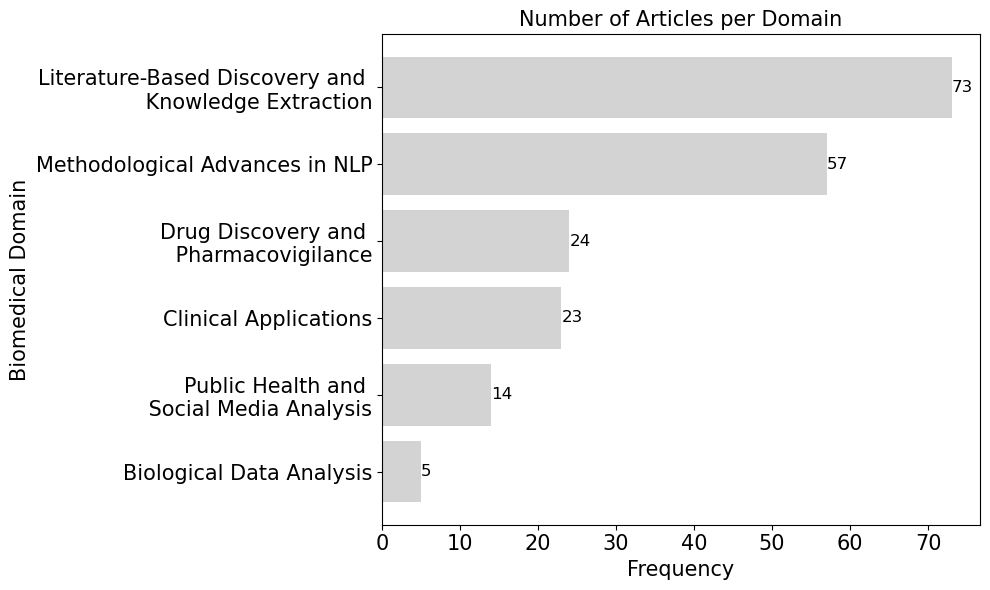

In [374]:
# Count the frequency of each category
#df['Biomedical Domain Main'] = df['Biomedical Domain Main'].replace("General biomedical text mining", "General biomedical \ntext mining")
#df['Biomedical Domain Main'] = df['Biomedical Domain Main'].replace("Biomedicla Literature Curation", "Biomedicla Literature \nCuration")
#df['Biomedical Domain Main'] = df['Biomedical Domain Main'].replace("Literature-Based Discovery", "Literature-Based \nDiscovery")

category_counts = df['Biomedical Domain Level 1'].value_counts()
top_n = 11

# Get the top 10 categories
top_10_categories = category_counts#.head(top_n) SHOW ALL!

# Sort the categories in descending order
top_10_categories = top_10_categories.sort_values(ascending=True)

# Transpose the DataFrame
top_10_categories = top_10_categories.transpose()


# Create a horizontal bar chart for the top 10 data types
plt.figure(figsize=(10, 6))
bars = plt.barh(top_10_categories.index, top_10_categories, color='lightgrey')

# Add labels to each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width}', va='center', fontsize=12)
    
plt.tick_params(axis='y', labelsize=15)
plt.tick_params(axis='x', labelsize=15)
plt.xlabel('Frequency', fontsize=15)
plt.ylabel('Biomedical Domain', fontsize=15)
plt.title('Number of Articles per Domain', fontsize=15)
plt.tight_layout()

# Save the plot to a local folder
plt.savefig('viz/number_of_papers_domain_count_2024.pdf'.format(top_n))

# Display the chart
plt.show()


In [376]:
sum(category_counts)

196

In [392]:
filtered_df = df[(df['Biomedical Domain Level 1'] == 'Literature-Based Discovery and \n Knowledge Extraction') | (df['Biomedical Domain Level 1'] == 'Drug Discovery and \n Pharmacovigilance') | (df['Biomedical Domain Level 1'] == 'Public Health and \n Social Media Analysis')| (df['Biomedical Domain Level 1'] == 'Clinical Applications')]
filtered_df = filtered_df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
filtered_df['Biomedical Domain Level 2'].fillna("missing", inplace=True)

/var/folders/nd/2fzvhsh510gbt9x6z5pdb1gr0000gn/T/ipykernel_37234/3371693348.py:2: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



In [469]:
df[df['Biomedical Domain Level 1']=="Biological Data Analysis"]

,author,doi,Link to paper,title,journal,year,Extracted by,Included,Reason for exclusion,Target application,Domain of automated approach,Target database,Data type,Data filter applied,Hosted Application for End-users,Alternative Approach,LLM Model,Models/Resources used with LLM,System Architecture/ Flow,Programming language,Library/Framework,Library/Framework Harmonized,Reported performance metrics,Reported performance metrics Harmonized,Source code availability,Source code link,Data used availability,Preprocessing applied,Pretraining corpus origin,Pretraining corpus size,Fine-tuning corpus data/task,New annotations,Annotations type,New dataset developed,Fine-tuning corpus size,Number of tasks/datasets for performance evaluation,Hardware used for training/validation/fine-tuning,Hardware type,Internal validity 1,Internal validity 2,External validity,External validity.1,Comment,Unnamed: 43,url,label,type,abstract,address,accession,Link,issue,keywords,language,issn,pages,volume,DA,DB,DP,ID,j2,m3,n1,ST,m1,c5,c2,c1,OP,publication_type,Unnamed: 40,Data availability,Unnamed: 33,Biomedical Domain,Domain Details,Biomedical Domain Level 1,Biomedical Domain Level 2,Biomedical Domain Level 3
15,"Elangovan, A. and Li, Y. and Pires, D. E. V. a...",10.1186/s12859-021-04504-x,https://doi.org/10.1186/s12859-021-04504-x,Large-scale protein-protein post-translational...,BMC Bioinformatics,2022,SDO,1,NaN,Information Extraction,Biological Functions: Protein-protein post-tra...,PubMed,Abstracts,NaN,no,NaN,BioBERT Ensamble,GNormPlus for gene name recognition and normal...,Normalized Input -> Tokenization -> BioBERT,Python,sagemaker,SageMaker,"F1-macro, F1-micro, Confidence Calibration, Re...","F1-Macro, F1-Micro, Confidence Calibration, Re...",yes,https://github.com/elangovana/large-scale-ptm-ppi,yes,"Noise reduction, hegative samples generation",same as BioBERT,same as BioBERT,IntAct Database of PTM-PPI interactions,distant supervised dataset annotated with inte...,NaN,yes,279 positive and 1579 negative samples,1,NaN,NaN,yes,"yes, Bernoulli (binary) dropout layers",yes,iPTMnet,NaN,NaN,https://ovidsp.ovid.com/ovidweb.cgi?T=JS&CSC=Y...,Elangovan_2022_BMCBio,JOUR,MOTIVATION: Protein-protein interactions (PPIs...,"Elangovan, Aparna. School of Computing and Inf...",34983371.0,NaN,1,*Data Mining and Humans and *Protein Processin...,English,1471-2105,4,23,2023-01-04 00:00:00,MEDLINE,Ovid Technologies,1364.0,BMC Bioinformatics,NaN,"Elangovan, Aparna Li, Yuan Pires, Douglas E V ...",Large-scale protein-protein post-translational...,NaN,NaN,NaN,NaN,NaN,biomedical_journal,NaN,NaN,NaN,Biological Functions,Protein-protein post-translational modificati...,Biological Data Analysis,None,None
154,"Wang, M. and Vijayaraghavan, A. and Beck, T. a...",10.1101/2023.06.23.546229,http://dx.doi.org/10.1101/2023.06.23.546229,Vocabulary Matters: An Annotation Pipeline and...,bioRxiv,2023,SQ,1,NaN,Named Entity Recognition,Biological Functions: enzyme text-mining and i...,PubMed,full-text,NaN,No,NaN,"SciBERT-BiLSTM, BioBERT-BiLSTM",NaN,NaN,Python,NaN,"Tensorflow, numpy",NaN,"Precision, Recall, F1-Score",Yes,https://github.com/omicsNLP/enzymeNER,NaN,NaN,depends on BERT model,NaN,Self-collected data,NaN,NaN,Yes,"3,525 full-text publications, split 75:10:15 i...",1,NaN,"CPU, GPU",Yes,"Yes, feeding the output from the embedding mod...",Yes,BERN2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,biomedical_journal,NaN,Yes,NaN,Biological Functions,enzyme text-mining and information extraction,Biological Data Analysis,None,None
156,"Babaiha, N. S. and Elsayed, H. and Zhang, B. a...",10.1016/j.ailsci.2023.100078,http://dx.doi.org/10.1016/j.ailsci.2023.100078,A natural language processing system for the e...,Artificial Intelligence in the Life Sciences,2023,SQ,1,NaN,Knowledge Graph,Biological Functions: focused on the KG regard...,PubMed,"abstract, full-text",Tau protein,Yes,NaN,BERT,NaN,NaN,Python,NaN,"TensorFlow, PyTorch",Na

In [394]:
filtered_df[['doi','Biomedical Domain Level 1', 'Biomedical Domain Level 2']].head()

,doi,Biomedical Domain Level 1,Biomedical Domain Level 2
0,10.2196/29398,Literature-Based Discovery and \n Knowledge Ex...,Literature Screening
2,10.1016/j.jbi.2020.103578,Literature-Based Discovery and \n Knowledge Ex...,Literature Screening
3,10.1093/bioinformatics/btac754,Drug Discovery and \n Pharmacovigilance,Drug-Drug Interaction
4,10.1186/s13643-021-01763-w,Literature-Based Discovery and \n Knowledge Ex...,Literature Screening
7,10.1186/s12911-019-0992-8,Literature-Based Discovery and \n Knowledge Ex...,Literature Screening


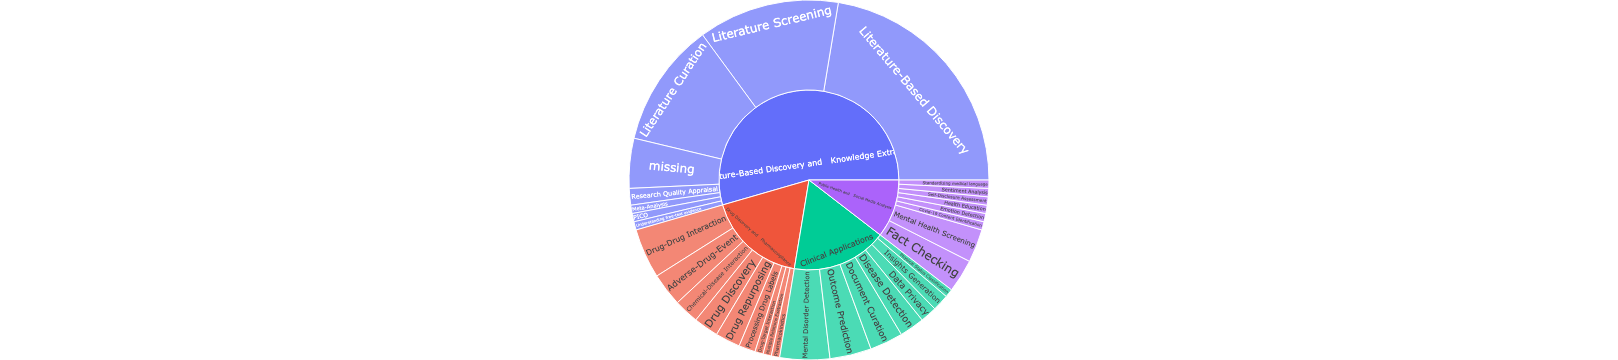

In [396]:
import plotly.express as px

# Create a sunburst chart
fig = px.sunburst(filtered_df, path=['Biomedical Domain Level 1', 'Biomedical Domain Level 2'])

# Update layout for better readability
fig.update_layout(margin=dict(t=0, l=0, r=0, b=0))

# Show the chart
fig.show()


In [398]:
from collections import defaultdict

category_counts = defaultdict(lambda: defaultdict(int))

# Iterate over the DataFrame rows
for _, row in filtered_df.iterrows():
    # Increment the count of the (Level 1, Level 2) pair
    category_counts[row['Biomedical Domain Level 1']][row['Biomedical Domain Level 2']] += 1

# Convert the defaultdict to a regular dict and sort the subcategories by count, descending
categories = {lvl1: sorted(lvl2.items(), key=lambda item: item[1], reverse=True)
               for lvl1, lvl2 in category_counts.items()}

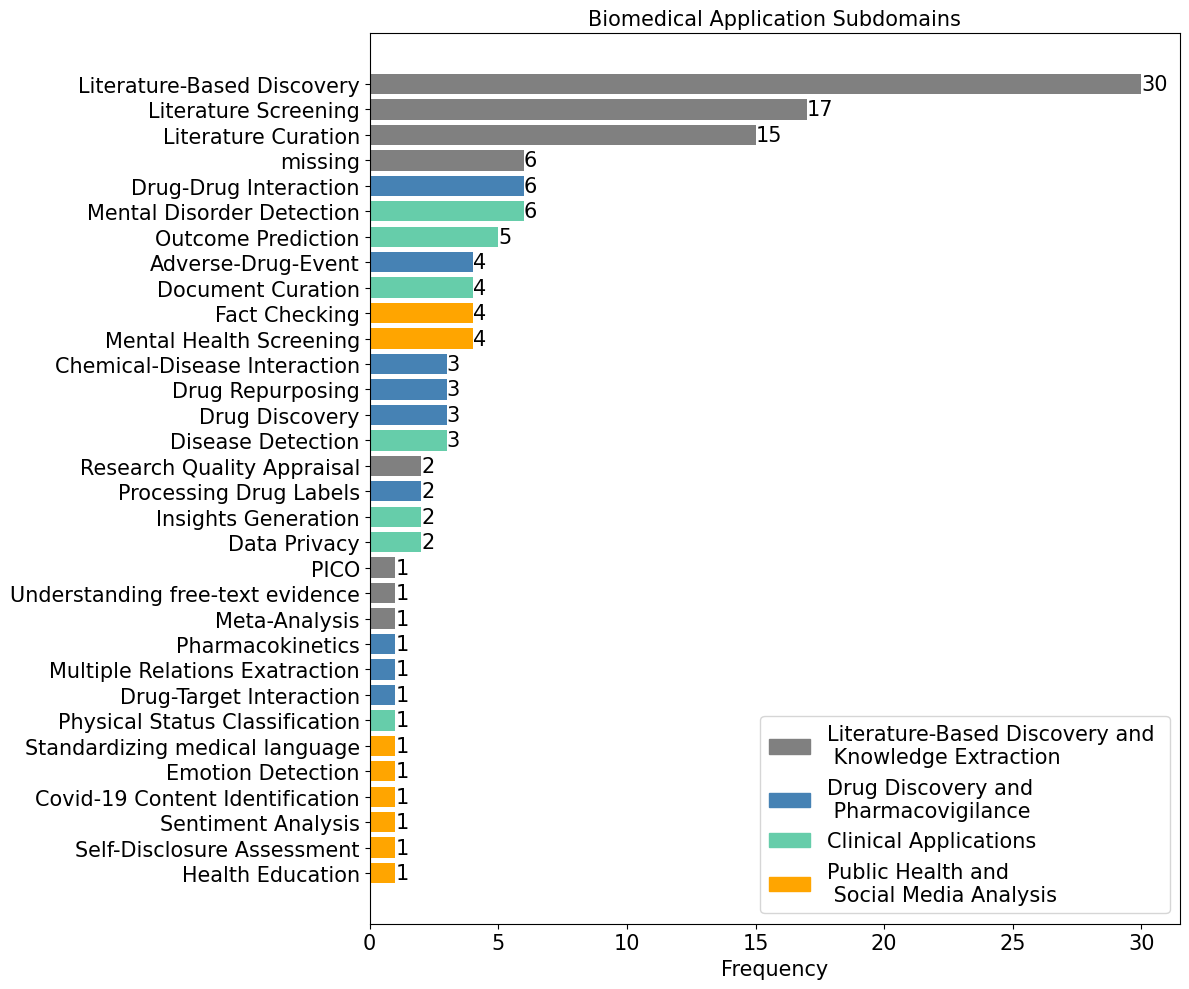

In [402]:
import matplotlib.pyplot as plt

# Define colors for each main category
category_colors = {'Literature-Based Discovery and \n Knowledge Extraction': 'gray', 'Drug Discovery and \n Pharmacovigilance': 'steelblue', 'Clinical Applications': 'mediumaquamarine', 'Public Health and \n Social Media Analysis': 'orange'}

# Create the figure and the axes with increased figure size
fig, ax = plt.subplots(figsize=(12, 10))

# Combine all subcategories and their values into a single list
all_items = [(subcat, value) for items in categories.values() for subcat, value in items]

# Sort the items by value in ascending order
sorted_items = sorted(all_items, key=lambda x: x[1], reverse=True)

# Loop over the sorted items in reverse order to create the stacked bar chart.
for subcat, value in reversed(sorted_items):
    # Find the category for the current subcategory
    for category, items in categories.items():
        if (subcat, value) in items:
            # Plot the horizontal bar with the corresponding value and color
            bar = ax.barh(subcat, value, color=category_colors[category])
            # Display the value at the end of each bar using the bar width
            bar_width = bar[0].get_width()
            # Use the bar's y-coordinate for text placement
            bar_y = bar[0].get_y() + bar[0].get_height() / 2
            ax.text(bar_width, bar_y, str(value), va='center', color='black', fontsize=15)  # Set the text size to 15

# Set the title of the chart with font size
ax.set_title('Biomedical Application Subdomains', fontsize=15)

# Add a legend for the colors
handles = [plt.Rectangle((0, 0), 1, 1, color=color, label=category) for category, color in category_colors.items()]
ax.legend(handles=handles, loc='lower right', fontsize=15)  # Set the legend font size to 15

# Set the x-axis label
ax.set_xlabel('Frequency', fontsize=15)  # Set the x-axis label and font size

# Show the x-axis labels and title
ax.xaxis.set_visible(True)

# Set the font size for x-axis and y-axis labels
ax.tick_params(axis='both', labelsize=15)

plt.tight_layout()  # Adjust subplot spacing to avoid cutting off labels

plt.savefig('viz/number_of_papers_subdomain_count_2024.pdf'.format(top_n))

# Show the plot
plt.show()


## Target NLP Task

In [405]:
#df = pd.concat([df_initial, df_2024_included], ignore_index=True)
#df['year'] = df['year'].astype(int)

In [407]:
df['Target application'].value_counts()

Target application
Text Classification              55
Information Extraction           27
Relation Extraction              25
Multi-Domain                     19
Named Entity Recognition         16
Information Retrieval            13
Entity Normalization/Linking      9
Knowledge Graph                   7
Text Summarization                5
Similarity Clustering             4
Question Answering                4
Text Generation                   3
Fact Verification                 2
Machine Reading Comprehension     2
Explainable/ Fair AI              2
Dependency Parsing                1
Coreference Resolution            1
Topic Modelling                   1
Name: count, dtype: int64

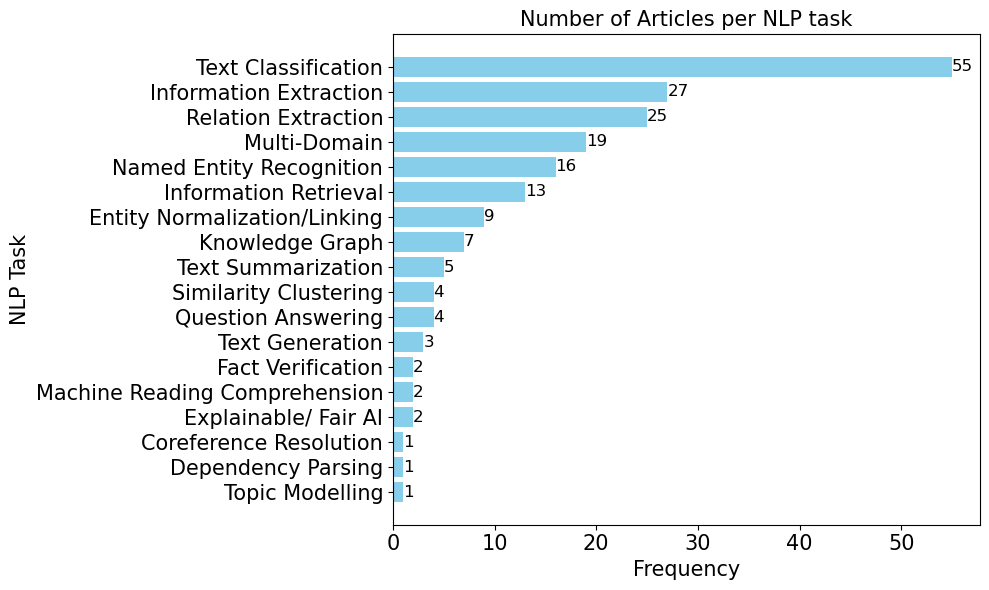

In [409]:
category_counts = df['Target application'].value_counts()
top_n = len(df['Target application'].value_counts()) # interested in all categories

# Get the top 10 categories
top_10_categories = category_counts#.head(top_n)

# Sort the categories in descending order
top_10_categories = top_10_categories.sort_values(ascending=True)

# Transpose the DataFrame
top_10_categories = top_10_categories.transpose()


# Create a horizontal bar chart for the top 10 data types
plt.figure(figsize=(10, 6))
bars = plt.barh(top_10_categories.index, top_10_categories, color='skyblue')

# Add labels to each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width}', va='center', fontsize=12)
    
plt.tick_params(axis='y', labelsize=15)
plt.tick_params(axis='x', labelsize=15)
plt.xlabel('Frequency', fontsize=15)
plt.ylabel('NLP Task', fontsize=15)
plt.title('Number of Articles per NLP task', fontsize=15)
plt.tight_layout()

# Save the plot to a local folder
plt.savefig('viz/target_NLP_application_count_2024.pdf'.format(top_n))

# Display the chart
plt.show()

### combined domains and nlp tasks 

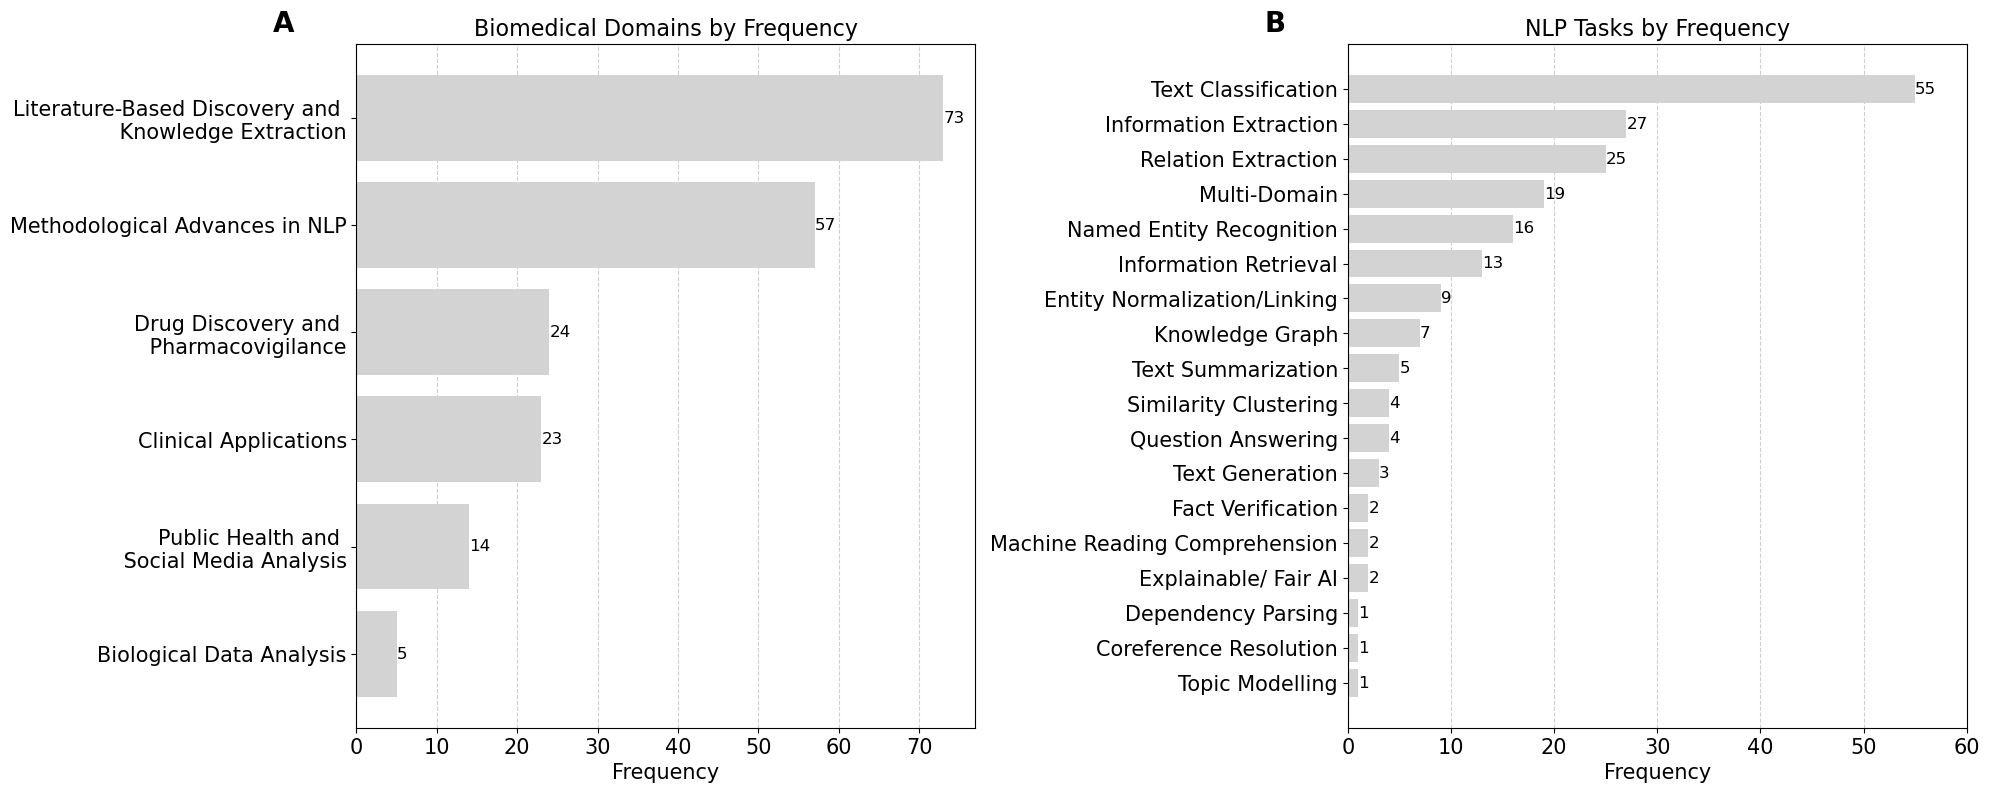

In [416]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with information on biomedical domains and target NLP applications

# Get the top counts for Biomedical Domain Level 1 and Target application
top_biomedical_domains = df['Biomedical Domain Level 1'].value_counts()
top_nlp_tasks = df['Target application'].value_counts()

# Reverse the order for plotting to have the largest counts at the top of the plot
top_biomedical_domains_reversed = top_biomedical_domains[::-1]
top_nlp_tasks_reversed = top_nlp_tasks[::-1]

# Create a larger figure to hold both subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

# Plot for Top Biomedical Domains by Frequency
bars_domains = axes[0].barh(top_biomedical_domains_reversed.index, top_biomedical_domains_reversed, color='lightgrey', zorder=2)
# Add labels to each bar in the domains plot
for bar in bars_domains:
    width = bar.get_width()
    axes[0].text(width, bar.get_y() + bar.get_height() / 2, f'{width}', va='center', fontsize=12)
    
axes[0].text(-0.1, 1.05, 'A', transform=axes[0].transAxes, fontsize=20, fontweight='bold', va='top', ha='right')
axes[0].tick_params(axis='y', labelsize=15)
axes[0].tick_params(axis='x', labelsize=15)
axes[0].set_xlabel('Frequency', fontsize=15)
axes[0].set_title('Biomedical Domains by Frequency', fontsize=16)
axes[0].set_xlim(0, 77)  # Adjust the x-axis limit if needed
axes[0].grid(axis='x', linestyle='--', alpha=0.6, zorder=1)

# Plot for Top NLP Tasks by Frequency
bars_tasks = axes[1].barh(top_nlp_tasks_reversed.index, top_nlp_tasks_reversed, color='lightgrey',zorder=2)
# Add labels to each bar in the NLP tasks plot
for bar in bars_tasks:
    width = bar.get_width()
    axes[1].text(width, bar.get_y() + bar.get_height() / 2, f'{width}', va='center', fontsize=12)
    
axes[1].text(-0.1, 1.05, 'B', transform=axes[1].transAxes, fontsize=20, fontweight='bold', va='top', ha='right')
axes[1].tick_params(axis='y', labelsize=15)
axes[1].tick_params(axis='x', labelsize=15)
axes[1].set_xlabel('Frequency', fontsize=15)
axes[1].set_title('NLP Tasks by Frequency', fontsize=16)
axes[1].set_xlim(0, 60)  # Adjust the x-axis limit if needed
axes[1].grid(axis='x', linestyle='--', alpha=0.6, zorder=1)

plt.tight_layout()
# Save the combined plot to a local folder
plt.savefig('viz/domains_and_nlp_tasks_frequency_2024.pdf')
# Display the combined chart
plt.show()


### Domains - NLP Tasks Sanky Diagram

In [419]:
#%pip install pySankey

In [421]:
#%pip install webcolors

In [423]:
# Group by 'Biomedical Domain Level 1' and 'Target application' and count
count_df = df.groupby(['Biomedical Domain Level 1', 'Target application']).size().reset_index(name='Sum of Included')

# Sort the DataFrame based on the count in descending order
count_df = count_df.sort_values(by='Sum of Included', ascending=False).reset_index(drop=True)
count_df.head()

,Biomedical Domain Level 1,Target application,Sum of Included
0,Literature-Based Discovery and \n Knowledge Ex...,Text Classification,26
1,Drug Discovery and \n Pharmacovigilance,Relation Extraction,16
2,Methodological Advances in NLP,Multi-Domain,15
3,Clinical Applications,Text Classification,14
4,Literature-Based Discovery and \n Knowledge Ex...,Information Retrieval,12


In [445]:
top_5_domains = df['Biomedical Domain Level 1'].value_counts().head(5).index.tolist()
top_5_domains

['Literature-Based Discovery and \n Knowledge Extraction',
 'Methodological Advances in NLP',
 'Drug Discovery and \n Pharmacovigilance',
 'Clinical Applications',
 'Public Health and \n Social Media Analysis']

In [447]:
filtered_count_df = count_df[count_df["Biomedical Domain Level 1"].isin(top_5_domains)]


In [471]:
l1 = filtered_count_df["Biomedical Domain Level 1"].to_list()
l2 = filtered_count_df["Target application"].to_list()
l1 = [elem.replace('\n', '') for elem in l1]
l2 = [elem.replace('\n', '') for elem in l2]

connect_values = count_df["Sum of Included"].to_list()
levels_combined = list(set(l1+l2))
levels_combined

['Question Answering',
 'Machine Reading Comprehension',
 'Knowledge Graph',
 'Dependency Parsing',
 'Clinical Applications',
 'Information Retrieval',
 'Drug Discovery and  Pharmacovigilance',
 'Fact Verification',
 'Relation Extraction',
 'Topic Modelling',
 'Text Classification',
 'Multi-Domain',
 'Text Generation',
 'Literature-Based Discovery and  Knowledge Extraction',
 'Public Health and  Social Media Analysis',
 'Methodological Advances in NLP',
 'Similarity Clustering',
 'Coreference Resolution',
 'Explainable/ Fair AI',
 'Text Summarization',
 'Entity Normalization/Linking',
 'Named Entity Recognition',
 'Information Extraction']

In [473]:
#node_label = ["A1", "A2", "B1", "B2","B3", "C1", "C2"]
node_dict = {y:x for x, y in enumerate(levels_combined)}
node_dict

{'Question Answering': 0,
 'Machine Reading Comprehension': 1,
 'Knowledge Graph': 2,
 'Dependency Parsing': 3,
 'Clinical Applications': 4,
 'Information Retrieval': 5,
 'Drug Discovery and  Pharmacovigilance': 6,
 'Fact Verification': 7,
 'Relation Extraction': 8,
 'Topic Modelling': 9,
 'Text Classification': 10,
 'Multi-Domain': 11,
 'Text Generation': 12,
 'Literature-Based Discovery and  Knowledge Extraction': 13,
 'Public Health and  Social Media Analysis': 14,
 'Methodological Advances in NLP': 15,
 'Similarity Clustering': 16,
 'Coreference Resolution': 17,
 'Explainable/ Fair AI': 18,
 'Text Summarization': 19,
 'Entity Normalization/Linking': 20,
 'Named Entity Recognition': 21,
 'Information Extraction': 22}

In [475]:
source = l1 #['A1','A1','A1','A2','A2','A2','B1','B2','B2','B3','B3']
target = l2 #['B1','B2','B3','B1','B2','B3','C1','C1','C2','C1','C2'] 
values = connect_values #[ 10, 5, 15, 5, 20, 45, 15, 20, 5, 30, 30 ]

In [477]:
source_node = [node_dict[x] for x in source]
target_node = [node_dict[x] for x in target]

In [479]:
#source_node

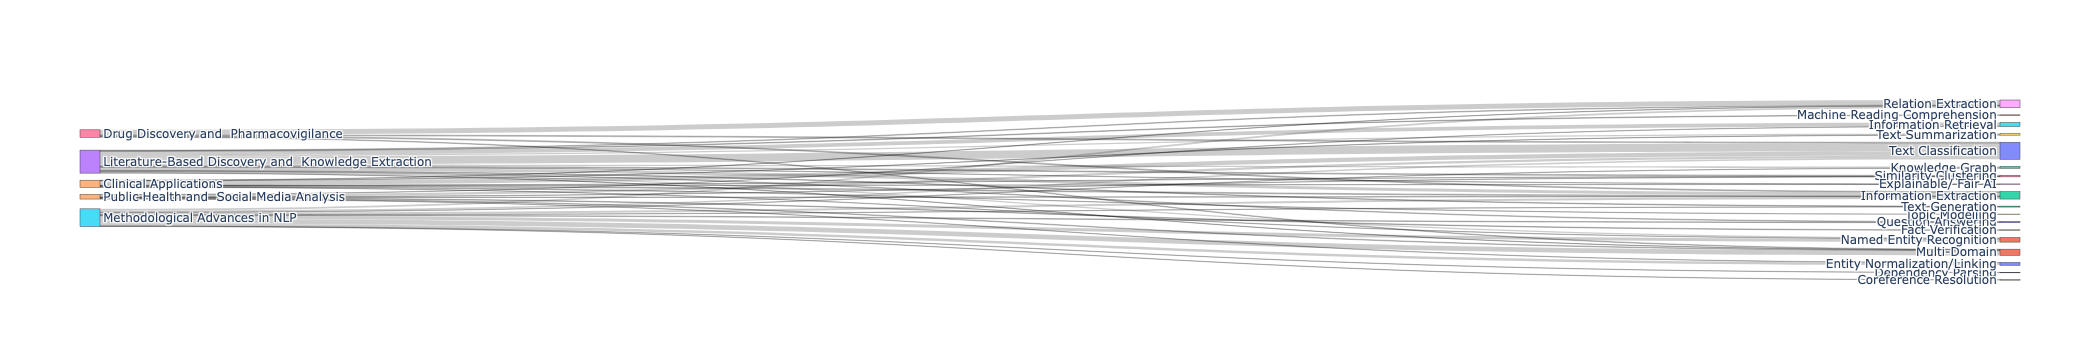

In [481]:
import plotly.graph_objects as go # Import the graphical object

fig = go.Figure( 
    data=[go.Sankey( # The plot we are interest
        # This part is for the node information
        node = dict( 
            label = levels_combined
        ),
        # This part is for the link information
        link = dict(
            source = source_node,
            target = target_node,
            value = values
        ))])

# With this save the plots 
plot(fig,
     image_filename='sankey_plot_1', 
     image='png', 
     image_width=900, 
     image_height=600
)
# And shows the plot
fig.show()

## LLMs

In [223]:
import requests

def get_publication_date(doi):
    url = f'https://api.crossref.org/works/{doi}'
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        # Extracting publication date
        publication_date = data['message'].get('published-print', data['message'].get('published-online', {}))
        date_parts = publication_date.get('date-parts', [[]])
        print(date_parts)
        if date_parts and date_parts[0]:
            # Format the date as YYYY-MM-DD, if month and day are available
            date_str = '-'.join(str(part) for part in date_parts[0])
            return date_str
        return "Publication date not available"
    else:
        return "Failed to fetch data for DOI"

# Example DOI
doi = '10.1038/nature12373'
print(get_publication_date(doi))

[[2013, 8]]
2013-8


In [225]:
df = pd.concat([df_initial, df_2024_included], ignore_index=True)
df['year'] = df['year'].astype(int)

# Create a new column to store the flattened data types
df['Flattened_Models'] = df['LLM Model'].str.split(', ')

# Explode the flattened data types into separate rows
df_exploded = df.explode('Flattened_Models')

In [229]:
df_exploded.head()

,author,doi,Link to paper,title,journal,year,Extracted by,Included,Reason for exclusion,Target application,Domain of automated approach,Target database,Data type,Data filter applied,Hosted Application for End-users,Alternative Approach,LLM Model,Models/Resources used with LLM,System Architecture/ Flow,Programming language,Library/Framework,Library/Framework Harmonized,Reported performance metrics,Reported performance metrics Harmonized,Source code availability,Source code link,Data used availability,Preprocessing applied,Pretraining corpus origin,Pretraining corpus size,Fine-tuning corpus data/task,New annotations,Annotations type,New dataset developed,Fine-tuning corpus size,Number of tasks/datasets for performance evaluation,Hardware used for training/validation/fine-tuning,Hardware type,Internal validity 1,Internal validity 2,External validity,External validity.1,Comment,Unnamed: 43,url,label,type,abstract,address,accession,Link,issue,keywords,language,issn,pages,volume,DA,DB,DP,ID,j2,m3,n1,ST,m1,c5,c2,c1,OP,publication_type,Unnamed: 40,Data availability,Unnamed: 33,Flattened_Models
0,"Abdelkader, W. and Navarro, T. and Parrish, R....",10.2196/29398,https://doi.org/10.2196/29398,A Deep Learning Approach to Refine the Identif...,JMIR Research Protocols,2021,BVI,1,NaN,Text Classification,Literature Screening/ Methodological Quality: ...,PubMed,Abstracts,NaN,no,NaN,"BERT, BioBERT, BlueBERT, PubMedBERT",NaN,BERT architecture,Python,HuggingFace,HuggingFace,"F1, recall, specificity, accuracy, precision, ...","F1-Score, Recall, Specificity, Accuracy, Preci...",no,NaN,partially,NaN,depends on BERT model,depends on BERT model,Custom-annotated PubMed data,"Article type: original study, systematic revie...",NaN,yes,"Total 2012–2020, N=160 712 (positive 29810 and...",1,"8 Intel Silver 4216 Cascade Lake CPU cores, an...","GPU, CPU",Yes,No,No,NaN,Protocol!,NaN,https://ovidsp.ovid.com/ovidweb.cgi?T=JS&CSC=Y...,Abdelkader_2021_JMIRReseProt,JOUR,BACKGROUND: A barrier to practicing evidence-b...,"Abdelkader, Wael. Health Information Research ...",34847061.0,NaN,11,NaN,English,1929-0748,e29398,10,2023-11-29 00:00:00,MEDLINE,Ovid Technologies,15.0,JMIR Res Protoc,NaN,"Abdelkader, Wael Navarro, Tamara Parrish, Rick...",A Deep Learning Approach to Refine the Identif...,NaN,NaN,NaN,NaN,NaN,biomedical_journal,NaN,NaN,NaN,BERT
0,"Abdelkader, W. and Navarro, T. and Parrish, R....",10.2196/29398,https://doi.org/10.2196/29398,A Deep Learning Approach to Refine the Identif...,JMIR Research Protocols,2021,BVI,1,NaN,Text Classification,Literature Screening/ Methodological Quality: ...,PubMed,Abstracts,NaN,no,NaN,"BERT, BioBERT, BlueBERT, PubMedBERT",NaN,BERT architecture,Python,HuggingFace,HuggingFace,"F1, recall, specificity, accuracy, precision, ...","F1-Score, Recall, Specificity, Accuracy, Preci...",no,NaN,partially,NaN,depends on BERT model,depends on BERT model,Custom-annotated PubMed data,"Article type: original study, systematic revie...",NaN,yes,"Total 2012–2020, N=160 712 (positive 29810 and...",1,"8 Intel Silver 4216 Cascade Lake CPU cores, an...","GPU, CPU",Yes,No,No,NaN,Protocol!,NaN,https://ovidsp.ovid.com/ovidweb.cgi?T=JS&CSC=Y...,Abdelkader_2021_JMIRReseProt,JOUR,BACKGROUND: A barrier to practicing evidence-b...,"Abdelkader, Wael. Health Information Research ...",34847061.0,NaN,11,NaN,English,1929-0748,e29398,10,2023-11-29 00:00:00,MEDLINE,Ovid Technologies,15.0,JMIR Res Protoc,NaN,"Abdelkader, Wael Navarro, Tamara Parrish, Rick...",A Deep Learning Approach to Refine the Identif...,NaN,NaN,NaN,NaN,NaN,biomedical_journal,NaN,NaN,NaN,BioBERT
0,"Abdelkader, W. and Navarro, T. and Parrish, R....",10.2196/29398,https://doi.org/10.2196/29398,A Deep Learning Approach to Refine the Identif...,JMIR Research Protocols,2021,BVI,1,NaN,Text Classification,Literature Screening/ Methodological Quality: ...,PubMed,Abstracts,NaN,no,NaN,"BERT, BioBERT, BlueBERT, PubMedBERT",NaN,BERT architecture,Python,HuggingFace,HuggingFace,"F1, recall, specificity, accu

In [265]:
df_filtered_gpt = df_exploded[df_exploded['Flattened_Models'].str.contains('GPT', case=False, na=False)]
df_filtered_gpt.shape

(16, 75)

In [160]:

df_exploded['Flattened_Models'] = df_exploded['Flattened_Models'].str.replace(r'(?i).*gpt.*', 'GPT', regex=True)
df_exploded['Flattened_Models'] = df_exploded['Flattened_Models'].str.replace(r'(?i).*t5.*', 'T5', regex=True)
df_exploded['Flattened_Models'] = df_exploded['Flattened_Models'].str.replace('Bio+Clinical BERT', 'BioClinicalBERT', regex=False)
df_exploded['Flattened_Models'] = df_exploded['Flattened_Models'].str.replace('Bio+ClinicalBERT', 'BioClinicalBERT', regex=False)
df_exploded['Flattened_Models'] = df_exploded['Flattened_Models'].str.replace('BioCinicalBERT', 'BioClinicalBERT', regex=False)
df_exploded['Flattened_Models'] = df_exploded['Flattened_Models'].str.replace('Sci-BERT uncased version', 'SciBERT', regex=False)
df_exploded['Flattened_Models'] = df_exploded['Flattened_Models'].str.replace('BioBERT (base and large)', 'BioBERT', regex=False)
df_exploded['Flattened_Models'] = df_exploded['Flattened_Models'].str.replace('AlBERT', 'ALBERT', regex=False)


# Remove leading and trailing whitespaces from the 'Flattened_Models' column
df_exploded['Flattened_Models'] = df_exploded['Flattened_Models'].str.strip()

# Count the frequency of each data type
data_type_counts = df_exploded['Flattened_Models'].value_counts()

# Print the frequency counts
# Adjust the maximum display options to show the full list
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Print the full list of data type counts
print(data_type_counts)

Flattened_Models
BERT                                                                                 87
BioBERT                                                                              82
PubMedBERT                                                                           29
SciBERT                                                                              26
BlueBERT                                                                             17
GPT                                                                                  16
RoBERTa                                                                              16
ClinicalBERT                                                                         13
T5                                                                                    8
BioClinicalBERT                                                                       8
ALBERT                                                                                6
DistilBERT     

### detailed generative trend

In [271]:
df = pd.concat([df_initial, df_2024_included], ignore_index=True)
df['year'] = df['year'].astype(int)

# Create a new column to store the flattened data types
df['Flattened_Models'] = df['LLM Model'].str.split(', ')

# Explode the flattened data types into separate rows
df_exploded = df.explode('Flattened_Models')

In [283]:
#filtered_df = df_exploded[df_exploded['Flattened_Models'].isin(['GPT', 'T5'])]
filtered_df = df_exploded[df_exploded['Flattened_Models'].str.contains('GPT|T5', case=False, na=False)]

filtered_df = filtered_df[['doi','title','Flattened_Models', 'year']]

filtered_df

,doi,title,Flattened_Models,year
45,10.1093/nar/gkac310,pubmedKB: an interactive web server for explor...,T5,2022
51,10.1093/bib/bbac409,BioGPT: generative pre-trained transformer for...,BioGPT,2022
105,10.18653/v1/2021.findings-emnlp.297,Evidence-based fact-checking of health-related...,T5,2021
120,10.18653/v1/2020.nlpcovid19-2.9,Transitioning from benchmarks to a real-world ...,monoT5,2023
141,10.18653/v1/2023.bionlp-1.54,KnowLab at RadSum23: comparing pre-trained lan...,T5,2023
144,10.1186/s12859-023-05411-z,Leveraging pre-trained language models for min...,GPT-3,2023
144,10.1186/s12859-023-05411-z,Leveraging pre-trained language models for min...,BioGPT,2023
148,10.1186/s12859-023-05439-1,Empirical evaluation of language modeling to a...,Flan-T5-XXL,2023
157,10.3389/fgene.2023.1238140,Comparative analysis of classification techniq...,BioGPT,2023
157,10.3389/fgene.2023.1238140,Comparative analysis of classification techniq...,Flan-T5,2023


In [285]:
# Count the number of unique DOIs per model
doi_count_per_model = filtered_df.groupby("Flattened_Models")["doi"].nunique().reset_index(name="doi_count")
doi_count_per_model

,Flattened_Models,doi_count
0,BioGPT,3
1,ChatGPT,5
2,ChatGPT3,1
3,Flan-T5,1
4,Flan-T5-XXL,1
5,Flan-T5-xxl,1
6,GPT-3,2
7,GPT-3.5,2
8,GPT-4,2
9,T5,4


In [279]:
# Define a function to fetch publication year and month
def get_pub_year_and_month(doi):
    url = f'https://api.crossref.org/works/{doi}'
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        pub_date = data['message'].get('published-print', data['message'].get('published-online', {}))
        date_parts = pub_date.get('date-parts', [[]])
        if date_parts and date_parts[0]:
            # Assuming the date is in the format [year, month, day]
            year = date_parts[0][0]
            month = date_parts[0][1] if len(date_parts[0]) > 1 else None
            return year, month
    return None, None

# Apply the function to each DOI in the filtered DataFrame
filtered_df['Publication Year'], filtered_df['Publication Month'] = zip(*filtered_df['doi'].apply(get_pub_year_and_month))
filtered_df

,doi,Flattened_Models,year,Publication Year,Publication Month
45,10.1093/nar/gkac310,T5,2022,2022.0,7.0
51,10.1093/bib/bbac409,BioGPT,2022,2022.0,11.0
105,10.18653/v1/2021.findings-emnlp.297,T5,2021,2021.0,NaN
120,10.18653/v1/2020.nlpcovid19-2.9,monoT5,2023,2020.0,NaN
141,10.18653/v1/2023.bionlp-1.54,T5,2023,2023.0,NaN
144,10.1186/s12859-023-05411-z,GPT-3,2023,2023.0,7.0
144,10.1186/s12859-023-05411-z,BioGPT,2023,2023.0,7.0
148,10.1186/s12859-023-05439-1,Flan-T5-XXL,2023,2023.0,9.0
157,10.3389/fgene.2023.1238140,BioGPT,2023,2023.0,11.0
157,10.3389/fgene.2023.1238140,Flan-T5,2023,2023.0,11.0


<Figure size 1000x600 with 0 Axes>

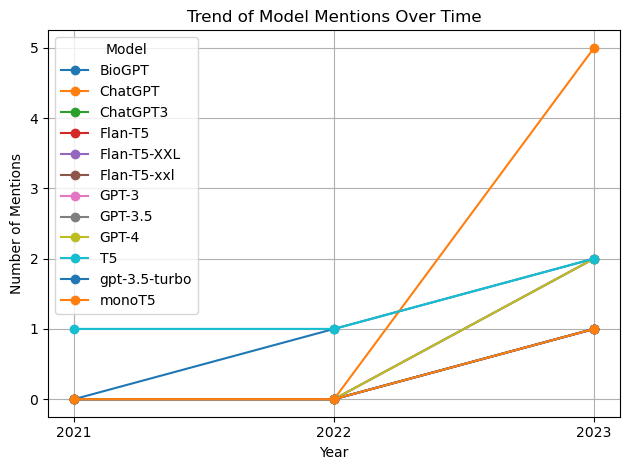

In [290]:
# Grouping the data by year and model to count occurrences of each model per year
trend_data = filtered_df.groupby(['year', 'Flattened_Models']).size().unstack(fill_value=0)

# Plotting the trend over time for each model
plt.figure(figsize=(10,6))
trend_data.plot(kind='line', marker='o')

plt.title('Trend of Model Mentions Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Mentions')
plt.xticks(trend_data.index)
plt.grid(True)
plt.legend(title='Model')
plt.tight_layout()

In [254]:
filtered_df.to_csv("generative_models_publications_with_dates.csv")

In [255]:
generative_df = pd.read_csv("generative_models_publications_with_dates.csv")

### models over time trend

In [89]:
sum(data_type_counts)

403

In [90]:
#df_year_model = df_exploded[["year", "Flattened_Models"]]
df_year_model = df_exploded[df_exploded['year'] != 2024][["year", "Flattened_Models"]]

# Group by year and model, and count occurrences
year_model_counts = df_year_model.groupby(['year', 'Flattened_Models']).size().reset_index(name='counts')

# For each year, find the top 5 models
top5_per_year = year_model_counts.groupby('year').apply(lambda x: x.nlargest(5, 'counts')).reset_index(drop=True)

# Pivot this data for plotting
pivot_data = top5_per_year.pivot(index='year', columns='Flattened_Models', values='counts').fillna(0)
pivot_data.head()

Flattened_Models,BERT,BioBERT,BlueBERT,ClinicalBERT,GPT,NCBI BERT,PubMedBERT,RoBERTa,SciBERT
year,,,,,,,,,
2019,10.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2020,19.0,14.0,0.0,4.0,0.0,0.0,0.0,5.0,7.0
2021,15.0,24.0,5.0,0.0,0.0,0.0,5.0,0.0,5.0
2022,13.0,19.0,5.0,0.0,0.0,0.0,10.0,0.0,6.0
2023,30.0,20.0,0.0,0.0,15.0,0.0,13.0,9.0,0.0


<Figure size 1200x800 with 0 Axes>

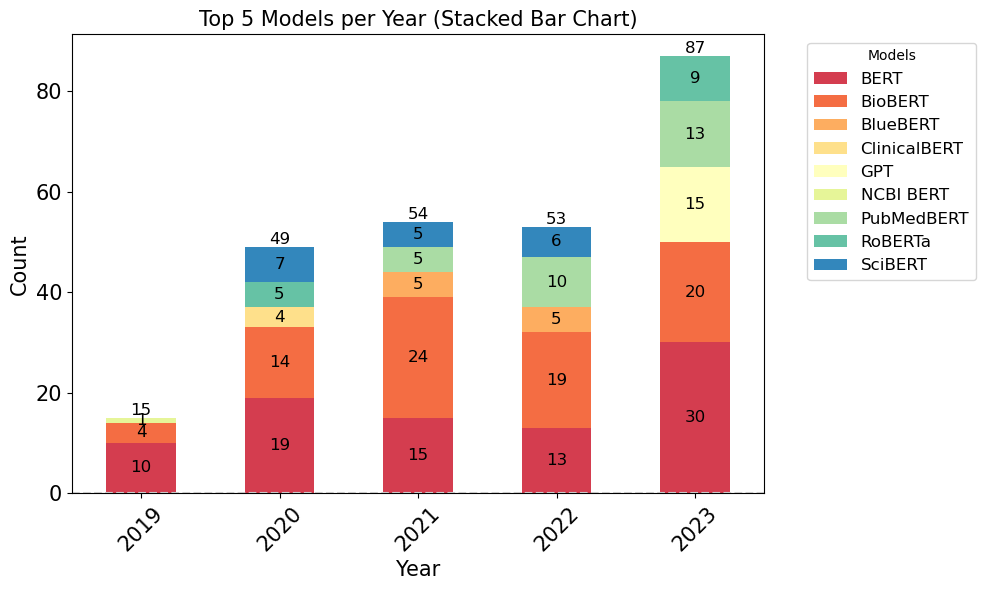

In [91]:
pastel_palette = sns.color_palette("Spectral", len(pivot_data.columns))

plt.figure(figsize=(12, 8))
ax = pivot_data.plot(kind='bar', stacked=True, figsize=(10, 6), color=pastel_palette)

# Adding data labels inside the bars
for rect in ax.patches:
    # Find where to place the label
    y_value = rect.get_y() + rect.get_height() / 2
    x_value = rect.get_x() + rect.get_width() / 2

    # Get the value to label
    value = int(rect.get_height())

    # Only label bars with a value
    if value > 0:
        ax.annotate(value, (x_value, y_value), ha='center', va='center', fontsize=12)

# Adding total label on top of each bar
for i, total in enumerate(pivot_data.sum(axis=1)):
    ax.text(i, total, str(int(total)), ha='center', va='bottom', fontsize=12)
    
# Adding a dashed line in the background
ax.axhline(y=0, color='lightgrey', linestyle='--', zorder=1)

plt.title("Top 5 Models per Year (Stacked Bar Chart)",fontsize=15)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.tick_params(axis='y', labelsize=15)
plt.tick_params(axis='x', labelsize=15)
plt.xticks(rotation=45)
plt.legend(title="Models", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.tight_layout()
plt.savefig('viz/LLM_models_top5_per_year_2024.pdf')
plt.show()

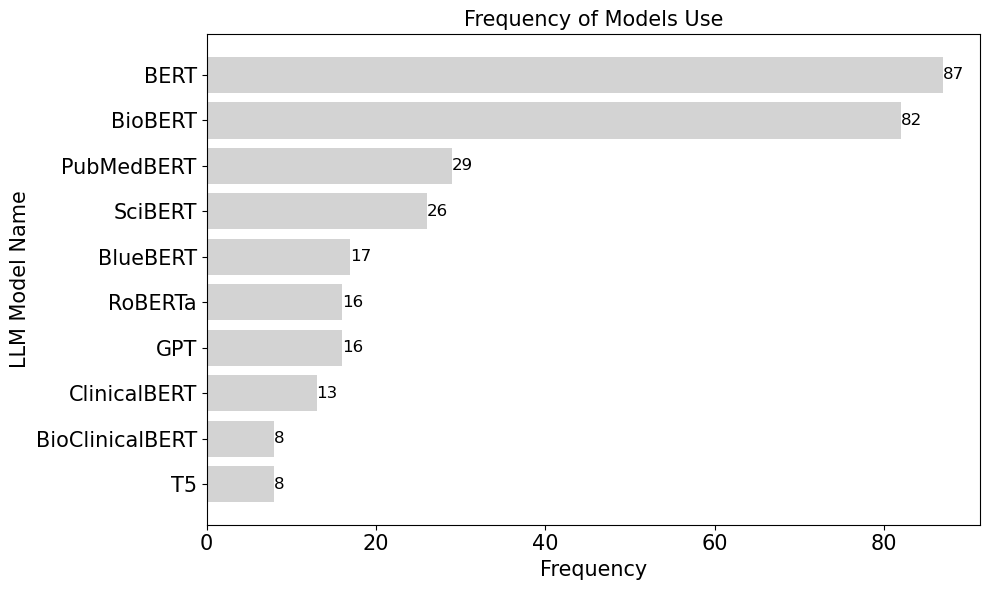

In [92]:
# Get the top 10 categories
top_10_categories = data_type_counts.head(10)

# Sort the categories in descending order
top_10_categories = top_10_categories.sort_values(ascending=True)

# Transpose the DataFrame
top_10_categories = top_10_categories.transpose()

# Create a horizontal bar chart for the top 10 data types
plt.figure(figsize=(10, 6))
bars = plt.barh(top_10_categories.index, top_10_categories, color='lightgrey')

# Add labels to each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width}', va='center', fontsize=12)
    
plt.tick_params(axis='y', labelsize=15)
plt.tick_params(axis='x', labelsize=15)
plt.xlabel('Frequency', fontsize=15)
plt.ylabel('LLM Model Name', fontsize=15)
plt.title('Frequency of Models Use', fontsize=15)
plt.tight_layout()

# Save the plot to a local folder
plt.savefig('viz/LLM_models_top_10_2024.pdf')

# Display the chart
plt.show()

In [93]:
top_10_categories

Flattened_Models
T5                  8
BioClinicalBERT     8
ClinicalBERT       13
GPT                16
RoBERTa            16
BlueBERT           17
SciBERT            26
PubMedBERT         29
BioBERT            82
BERT               87
Name: count, dtype: int64

In [94]:
sum(top_10_categories)

302

In [95]:
(302-27)/302

0.9105960264900662

In [96]:
302-27

275

### combine models and over time trend

In [97]:
# Define the extended Okabe-Ito palette with the additional Light Lavender Purple
custom_colors = [
    "#E69F00",  # Orange
    "#56B4E9",  # Sky Blue
    "#009E73",  # Bluish Green
    "#F0E442",  # Yellow
    "#0072B2",  # Blue
    "#D55E00",  # Vermilion
    "#CC79A7",  # Reddish Purple
    "#808080",  # Black
    "#008080"   # teal
]

# Convert the custom colors list to a seaborn palette
okabe_ito_palette = sns.color_palette(custom_colors)
okabe_ito_palette

[(0.9019607843137255, 0.6235294117647059, 0.0),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784),
 (0.0, 0.6196078431372549, 0.45098039215686275),
 (0.9411764705882353, 0.8941176470588236, 0.25882352941176473),
 (0.0, 0.4470588235294118, 0.6980392156862745),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.4745098039215686, 0.6549019607843137),
 (0.5019607843137255, 0.5019607843137255, 0.5019607843137255),
 (0.0, 0.5019607843137255, 0.5019607843137255)]

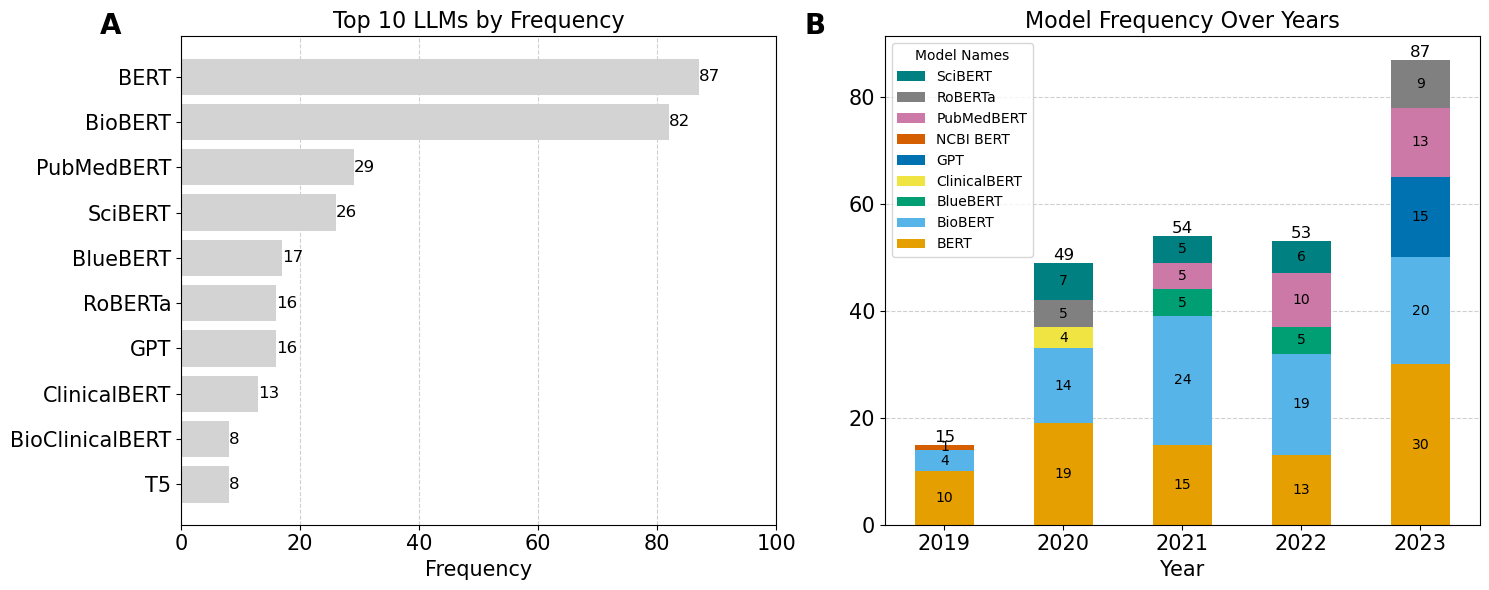

In [100]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a larger figure to hold both subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

# FIRST plot 
top_10_categories = data_type_counts.head(10)

# Sort the categories in descending order
top_10_categories = top_10_categories.sort_values(ascending=True)

# Transpose the DataFrame
top_10_categories = top_10_categories.transpose()

# Create a horizontal bar chart for the top 10 data types
#plt.figure(figsize=(10, 6))
bars = axes[0].barh(top_10_categories.index, top_10_categories, color='lightgrey',zorder=2)

# Add labels to each bar
for bar in bars:
    width = bar.get_width()
    axes[0].text(width, bar.get_y() + bar.get_height() / 2, f'{width}', va='center', fontsize=12)

axes[0].text(-0.1, 1.05, 'A', transform=axes[0].transAxes, fontsize=20, fontweight='bold', va='top', ha='right')
axes[0].tick_params(axis='y', labelsize=15)
axes[0].tick_params(axis='x', labelsize=15)
axes[0].set_xlabel('Frequency', fontsize=15)
#axes[0].set_ylabel('Data Sources', fontsize=15)
axes[0].set_title('Top 10 LLMs by Frequency', fontsize=16)
axes[0].set_xlim(0, 100)  # Set x-axis limit up to 125
axes[0].grid(axis='x', linestyle='--', alpha=0.6, zorder=1)


# SECOND plot - Stacked Bar Chart for Model Frequency over Years
#colors = plt.cm.Pastel1(np.linspace(0, 1, len(models)))
pivot_data.plot(kind='bar', stacked=True, ax=axes[1], color=okabe_ito_palette, figsize=(15, 6),zorder=2)

axes[1].text(-0.1, 1.05, 'B', transform=axes[1].transAxes, fontsize=20, fontweight='bold', va='top', ha='right')
axes[1].tick_params(axis='y', labelsize=15)
axes[1].tick_params(axis='x', labelsize=15, labelrotation=0)
axes[1].set_title('Model Frequency Over Years', fontsize=16)
axes[1].set_xlabel('Year', fontsize=15)

# Adding data labels inside the bars
for p in axes[1].patches:
    width, height = p.get_width(), p.get_height()
    if height > 0:
        axes[1].annotate(f'{int(height)}', (p.get_x() + width/2, p.get_y() + height/2), ha='center', va='center', fontsize=10)

# Adding total label on top of each bar
for i, total in enumerate(pivot_data.sum(axis=1)):
    axes[1].text(i, total, str(int(total)), ha='center', va='bottom', fontsize=12)

# Reverse the order of legend items and change the legend title
handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend(handles[::-1], labels[::-1], title='Model Names', fontsize=10)
axes[1].grid(axis='y', linestyle='--', alpha=0.6, zorder=1)

plt.tight_layout()
# Save the combined plot to a local folder
plt.savefig('viz/LLM_models_and_time_trend_2024.pdf')
# Display the combined chart
plt.show()

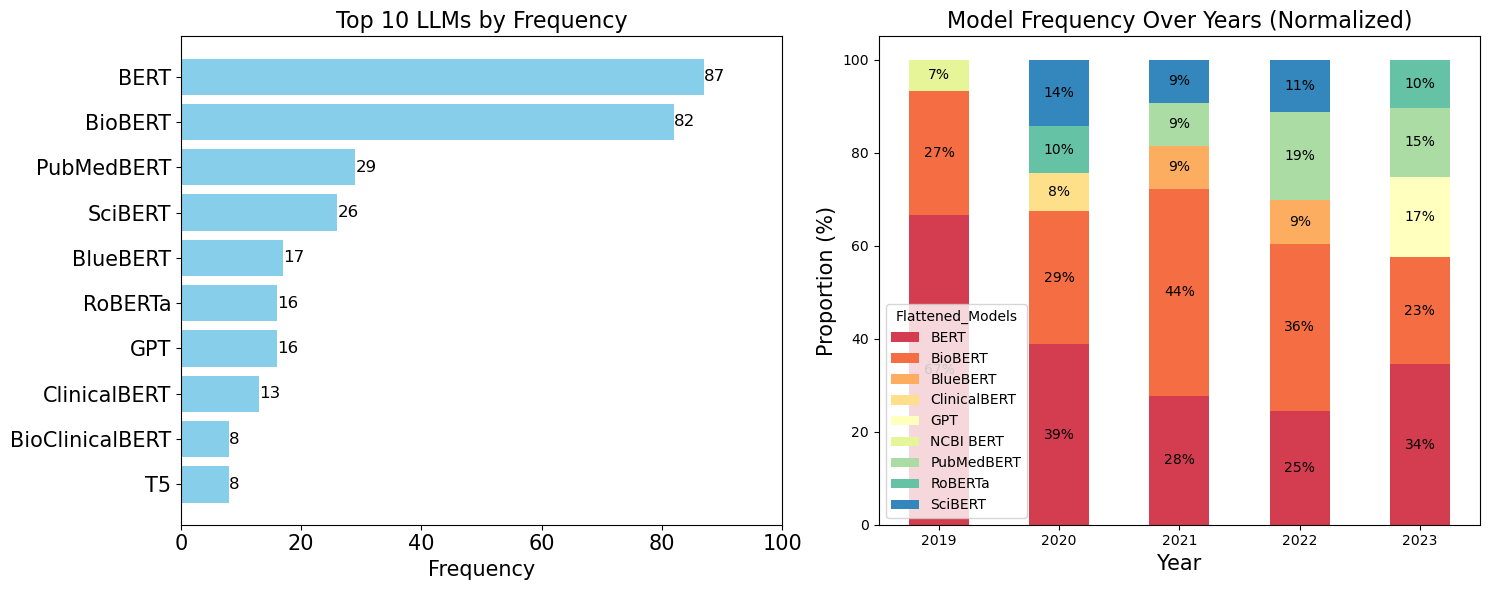

In [99]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a larger figure to hold both subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

# FIRST plot 
top_10_categories = data_type_counts.head(10)

# Sort the categories in descending order
top_10_categories = top_10_categories.sort_values(ascending=True)

# Transpose the DataFrame
top_10_categories = top_10_categories.transpose()

# Create a horizontal bar chart for the top 10 data types
#plt.figure(figsize=(10, 6))
bars = axes[0].barh(top_10_categories.index, top_10_categories, color='skyblue')

# Add labels to each bar
for bar in bars:
    width = bar.get_width()
    axes[0].text(width, bar.get_y() + bar.get_height() / 2, f'{width}', va='center', fontsize=12)

axes[0].tick_params(axis='y', labelsize=15)
axes[0].tick_params(axis='x', labelsize=15)
axes[0].set_xlabel('Frequency', fontsize=15)
#axes[0].set_ylabel('Data Sources', fontsize=15)
axes[0].set_title('Top 10 LLMs by Frequency', fontsize=16)
axes[0].set_xlim(0, 100)  # Set x-axis limit up to 125

# SECOND plot - Normalized Stacked Bar Chart for Model Frequency over Years
# Normalize the pivot_data DataFrame to reflect percentages rather than absolute counts
pivot_data_normalized = pivot_data.div(pivot_data.sum(axis=1), axis=0) * 100

pivot_data_normalized.plot(kind='bar', stacked=True, ax=axes[1], color=pastel_palette, figsize=(15, 6))
axes[1].set_title('Model Frequency Over Years (Normalized)', fontsize=16)
axes[1].set_xlabel('Year', fontsize=15)
axes[1].set_ylabel('Proportion (%)', fontsize=15)
axes[1].tick_params(axis='x', labelrotation=0)  # Making x-axis labels horizontal

# Corrected approach for adding percentage labels
for i, (index, row) in enumerate(pivot_data_normalized.iterrows()):
    cumulative_height = 0
    for model in row.index:
        percentage = row[model]
        if percentage > 0:  # Only add labels to non-zero segments
            x = i
            y = cumulative_height + percentage / 2  # Position at the middle of the segment
            label = f'{percentage:.0f}%' if percentage > 5 else ''  # Only label if segment is large enough
            axes[1].annotate(label, (x, y), ha='center', va='center', fontsize=10, rotation=0)
            cumulative_height += percentage

plt.tight_layout()
# Save the combined plot to a local folder
#plt.savefig('viz/LLM_models_and_time_trend_2024.pdf')
# Display the combined chart
plt.show()

### avg number of models over time

In [1503]:
df_year_model_list = df[df['year'] != 2024][["year", "Flattened_Models"]]
#df_year_model = df_exploded[df_exploded['year'] != 2024][["year", "Flattened_Models"]]


In [1504]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

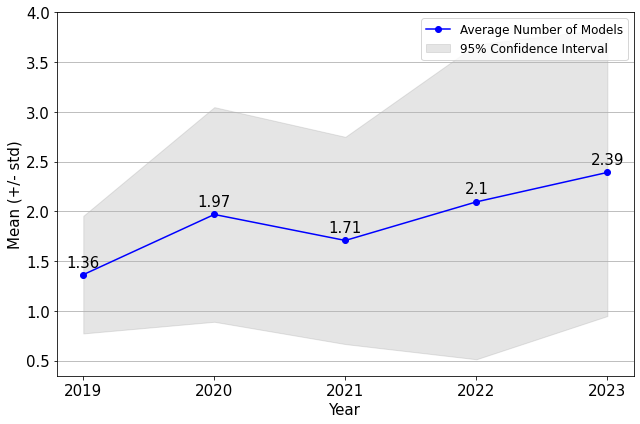

In [1508]:
# Convert the "year" column to integers
df_year_model_list['year'] = df_year_model_list['year'].astype(int)

# Calculate the number of models used by each paper
df_year_model_list['Num_Models_Used'] = df_year_model_list['Flattened_Models'].apply(lambda x: len(x) if isinstance(x, list) else 0)

# Calculate the average number of models for each year
yearly_avg = df_year_model_list.groupby('year')['Num_Models_Used'].mean()

# Calculate the confidence intervals for the averages
yearly_std = df_year_model_list.groupby('year')['Num_Models_Used'].std()
confidence_interval = stats.norm.interval(0.95, loc=yearly_avg, scale=yearly_std / np.sqrt(df_year_model_list['year'].nunique()))

# Create a DataFrame for the results
result_df = pd.DataFrame({
    "Year": yearly_avg.index,
    "Average_Num_Models": yearly_avg.values,
    "Lower_CI": confidence_interval[0],
    "Upper_CI": confidence_interval[1]
})

# Create a line graph with confidence intervals
plt.figure(figsize=(9, 6))
plt.plot(result_df['Year'], result_df['Average_Num_Models'], marker='o', label='Average Number of Models', color='b')
plt.fill_between(result_df['Year'], result_df['Lower_CI'], result_df['Upper_CI'], color='grey', alpha=0.2, label='95% Confidence Interval')

plt.tick_params(axis='y', labelsize=15)
plt.tick_params(axis='x', labelsize=15)
plt.xticks(result_df['Year'])  # Set the x-axis ticks to match the "Year" values
#plt.title("Mean Number of Models Used by Papers Published Each Year", fontsize=15)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Mean (+/- std)", fontsize=15)
plt.legend(fontsize=12)
plt.grid(axis='y')  # Enable grid only on the y-axis

# Annotate each data point with rounded values
for i, row in result_df.iterrows():
    plt.text(row['Year'], round(row['Average_Num_Models'], 2) + 0.05, round(row['Average_Num_Models'], 2), ha='center', va='bottom', fontsize=15)
    
plt.savefig('viz/LLM_number_per_paper_over_time_2024.pdf'.format(top_n))

plt.tight_layout()
plt.show()

In [1506]:
result_df

,Year,Average_Num_Models,Lower_CI,Upper_CI
0,2019,1.363636,0.772685,1.954588
1,2020,1.968750,0.889836,3.047664
2,2021,1.707317,0.665694,2.748940
3,2022,2.095238,0.512878,3.677598
4,2023,2.391304,0.947760,3.834848


## Technical Details

In [140]:
df = pd.concat([df_initial, df_2024_included], ignore_index=True)
df['year'] = df['year'].astype(int)

In [141]:
df_technical_setup = df[["Library/Framework Harmonized", "Hardware type", "Programming language" ,"publication_type"]]

In [142]:
df_technical_setup.head()

,Library/Framework Harmonized,Hardware type,Programming language,publication_type
0,HuggingFace,"GPU, CPU",Python,biomedical_journal
1,PyTorch,NaN,Python,biomedical_journal
2,PyTorch,GPU,Python,biomedical_journal
3,HuggingFace,NaN,Python,biomedical_journal
4,NaN,TPU,NaN,biomedical_journal


In [143]:
nan_count = df_technical_setup.isna().sum()

# Print the results
print(nan_count)


Library/Framework Harmonized     59
Hardware type                   118
Programming language             37
publication_type                  0
dtype: int64


In [144]:
nan_counts = df_technical_setup.groupby('publication_type').apply(lambda x: x.isna().sum())
nan_counts

,Library/Framework Harmonized,Hardware type,Programming language,publication_type
publication_type,,,,
biomedical_journal,38,90,26,0
nlp_venue,21,28,11,0


/var/folders/nd/2fzvhsh510gbt9x6z5pdb1gr0000gn/T/ipykernel_21028/3376449928.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/nd/2fzvhsh510gbt9x6z5pdb1gr0000gn/T/ipykernel_21028/3376449928.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



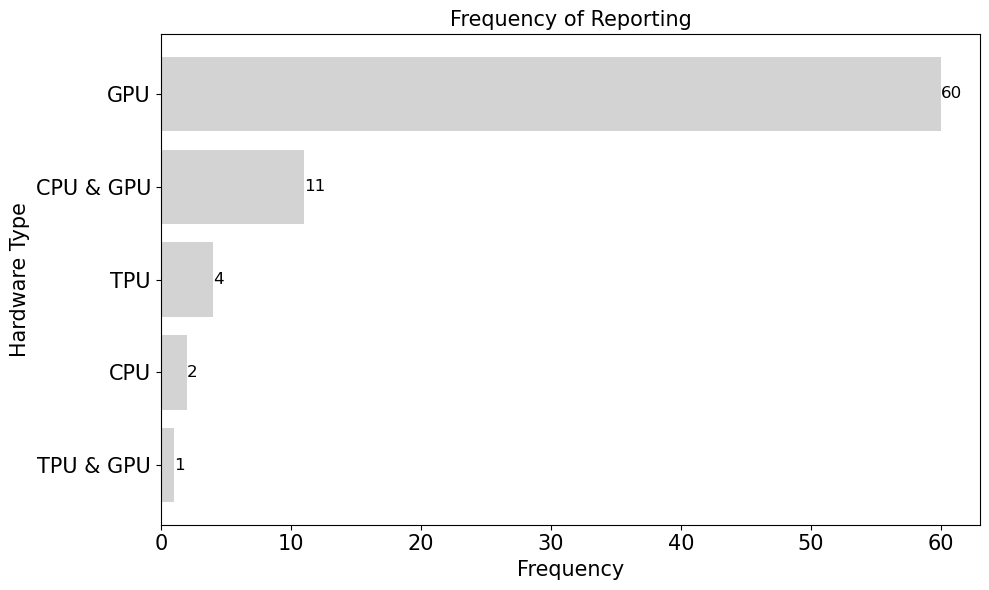

In [145]:
# Get the count of unique values in the "Hardware type" column
df_technical_setup['Hardware type'] = df_technical_setup['Hardware type'].str.replace('GPU, CPU','CPU, GPU')
df_technical_setup['Hardware type'] = df_technical_setup['Hardware type'].str.replace(', ',' & ')


hardware_type_counts = df_technical_setup['Hardware type'].value_counts()
hardware_type_counts = hardware_type_counts.sort_values(ascending=True)

# Create a horizontal bar chart for the top 10 data types
plt.figure(figsize=(10, 6))
bars = plt.barh(hardware_type_counts.index, hardware_type_counts, color='lightgrey')

# Add labels to each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width}', va='center', fontsize=12)
    
plt.tick_params(axis='y', labelsize=15)
plt.tick_params(axis='x', labelsize=15)
plt.xlabel('Frequency', fontsize=15)
plt.ylabel('Hardware Type', fontsize=15)
plt.title('Frequency of Reporting', fontsize=15)
plt.tight_layout()

# Save the plot to a local folder
plt.savefig('viz/technical_hardware_used_2024.pdf')

# Display the chart
plt.show()


In [146]:
hardware_type_counts

Hardware type
TPU & GPU     1
CPU           2
TPU           4
CPU & GPU    11
GPU          60
Name: count, dtype: int64

In [147]:
72/sum(hardware_type_counts)

0.9230769230769231

/var/folders/nd/2fzvhsh510gbt9x6z5pdb1gr0000gn/T/ipykernel_21028/3822139636.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



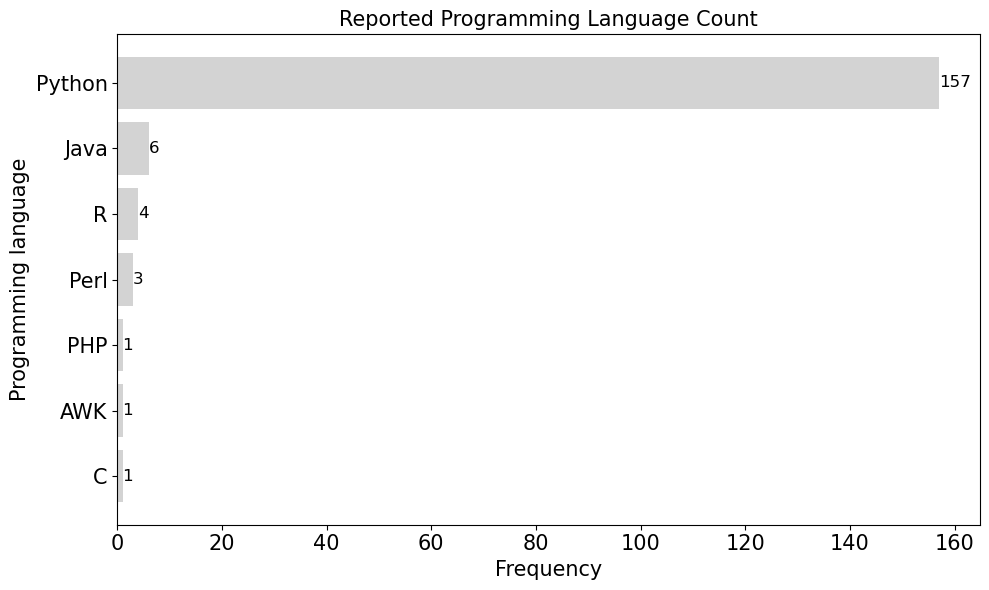

In [148]:
import pandas as pd
import matplotlib.pyplot as plt

# Split the values in the "Programming language" column by ","
df_technical_setup['Programming language'] = df_technical_setup['Programming language'].str.split(', ')

# Explode the list into separate rows
df_technical_setup = df_technical_setup.explode('Programming language')

# Get the count of unique values in the "Programming language" column
programming_language_counts = df_technical_setup['Programming language'].value_counts()
programming_language_counts = programming_language_counts.sort_values(ascending=True)

# Create a horizontal bar chart for the counts
plt.figure(figsize=(10, 6))
bars = plt.barh(programming_language_counts.index, programming_language_counts, color='lightgrey')

# Add labels to each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width}', va='center', fontsize=12)

plt.tick_params(axis='y', labelsize=15)
plt.tick_params(axis='x', labelsize=15)
plt.xlabel('Frequency', fontsize=15)
plt.ylabel('Programming language', fontsize=15)
plt.title('Reported Programming Language Count', fontsize=15)
plt.tight_layout()

# Save the plot to a local folder
plt.savefig('viz/technical_programming_language_count_2024.pdf')

# Display the chart
plt.show()


In [149]:
programming_language_counts

Programming language
C           1
AWK         1
PHP         1
Perl        3
R           4
Java        6
Python    157
Name: count, dtype: int64

In [150]:
157/sum(programming_language_counts)

0.9075144508670521

In [151]:
# Create a new column to store the flattened data types
df_technical_setup['Flattened_Libraries'] = df_technical_setup['Library/Framework Harmonized'].str.split(', ')

# Explode the flattened data types into separate rows
df_exploded = df_technical_setup.explode('Flattened_Libraries')
df_exploded['Flattened_Libraries'] = df_exploded['Flattened_Libraries'].str.lower()

df_exploded['Flattened_Libraries'] = df_exploded['Flattened_Libraries'].replace("nltk", "NLTK")
df_exploded['Flattened_Libraries'] = df_exploded['Flattened_Libraries'].replace("transformers", "HuggingFace")
df_exploded['Flattened_Libraries'] = df_exploded['Flattened_Libraries'].replace("transformer", "HuggingFace")
df_exploded['Flattened_Libraries'] = df_exploded['Flattened_Libraries'].replace("huggingface", "HuggingFace")
df_exploded['Flattened_Libraries'] = df_exploded['Flattened_Libraries'].replace("tensorflow", "TensorFlow")
df_exploded['Flattened_Libraries'] = df_exploded['Flattened_Libraries'].replace("pytorch", "PyTorch")
df_exploded['Flattened_Libraries'] = df_exploded['Flattened_Libraries'].replace("stanford corenlp", "CoreNLP ")
 

# Count the frequency of each data type
library_counts_flat = df_exploded['Flattened_Libraries'].value_counts()

In [152]:
# Get the top 10 categories
top_10_libraries = library_counts_flat.head(10)

# Sort the categories in descending order
top_10_libraries = top_10_libraries.sort_values(ascending=True)
top_10_libraries

Flattened_Libraries
torch            4
gensim           5
keras            7
CoreNLP          7
spacy           10
NLTK            13
scikit-learn    21
TensorFlow      30
PyTorch         48
HuggingFace     83
Name: count, dtype: int64

In [153]:
30/sum(top_10_libraries)

0.13157894736842105

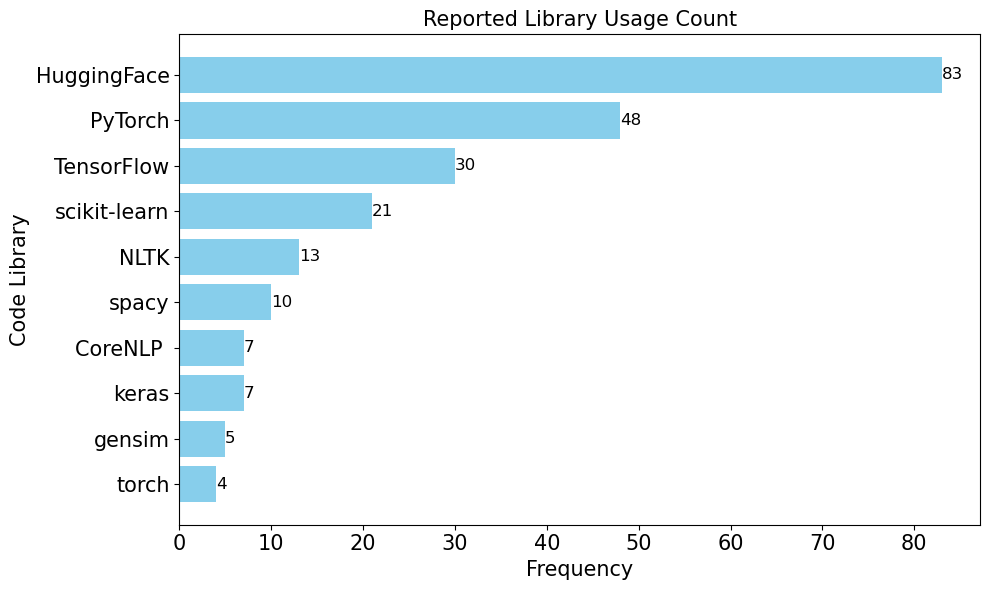

In [154]:
#library_counts = df['Library/Framework Harmonized'].value_counts()
#library_counts = library_counts.sort_values(ascending=True)

# Create a horizontal bar chart for the top 10 data types
plt.figure(figsize=(10, 6))
bars = plt.barh(top_10_libraries.index, top_10_libraries, color='skyblue')

# Add labels to each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width}', va='center', fontsize=12)
    
plt.tick_params(axis='y', labelsize=15)
plt.tick_params(axis='x', labelsize=15)
plt.xlabel('Frequency', fontsize=15)
plt.ylabel('Code Library', fontsize=15)
plt.title('Reported Library Usage Count', fontsize=15)
plt.tight_layout()

# Save the plot to a local folder
plt.savefig('viz/technical_code_library_count_2024.pdf')

# Display the chart
plt.show()

In [155]:
library_counts_flat

Flattened_Libraries
HuggingFace                       83
PyTorch                           48
TensorFlow                        30
scikit-learn                      21
NLTK                              13
spacy                             10
keras                              7
CoreNLP                            7
gensim                             5
torch                              4
numpy                              4
neo4j                              4
scispacy                           3
scipy                              3
top2vec                            2
requests                           2
boto3                              2
fairseq                            2
allennlp                           2
entrez                             2
subword-nmt                        2
rdkit                              2
chainer-chemistry                  2
bertopic                           2
tqdm                               2
r topicmodels                      2
clamp toolkit     

In [156]:
top_10_libraries.replace('Stanford CoreNLP', 'CoreNLP')

Flattened_Libraries
torch            4
gensim           5
keras            7
CoreNLP          7
spacy           10
NLTK            13
scikit-learn    21
TensorFlow      30
PyTorch         48
HuggingFace     83
Name: count, dtype: int64

### technical summary

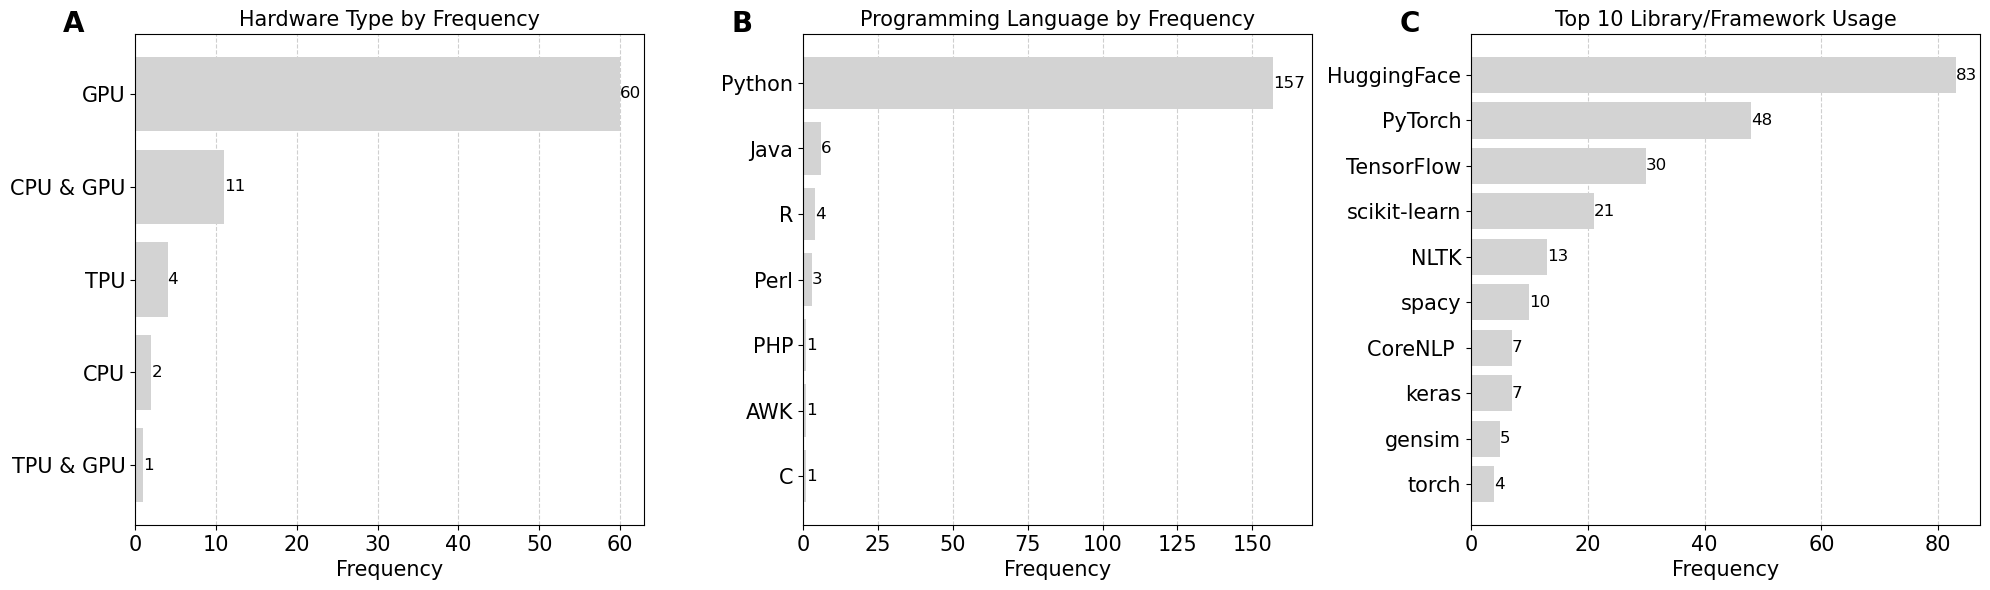

In [157]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df_technical_setup and top_10_libraries are already defined with the necessary data

# Setup for subplot arrangement
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

# Plot for "Hardware type"
axes[0].barh(hardware_type_counts.index, hardware_type_counts, color='lightgrey',zorder=2)
for i, v in enumerate(hardware_type_counts):
    axes[0].text(v, i, f"{v}", va='center', fontsize=12)

# Plot for "Programming language"
axes[1].barh(programming_language_counts.index, programming_language_counts, color='lightgrey',zorder=2)
for i, v in enumerate(programming_language_counts):
    axes[1].text(v, i, f"{v}", va='center', fontsize=12)

# Plot for "Library/Framework Harmonized"
# Assuming top_10_libraries data is prepared similarly to the previous examples
axes[2].barh(top_10_libraries.index, top_10_libraries, color='lightgrey',zorder=2)
for i, v in enumerate(top_10_libraries):
    axes[2].text(v, i, f"{v}", va='center', fontsize=12)

# Setting labels and titles for each subplot
axes[0].text(-0.1, 1.05, 'A', transform=axes[0].transAxes, fontsize=20, fontweight='bold', va='top', ha='right')
axes[0].set_xlabel('Frequency', fontsize=15)
axes[0].set_title('Hardware Type by Frequency', fontsize=15)
axes[0].tick_params(axis='y', labelsize=15)
axes[0].tick_params(axis='x', labelsize=15)
axes[0].grid(axis='x', linestyle='--', alpha=0.6, zorder=1)

axes[1].text(-0.1, 1.05, 'B', transform=axes[1].transAxes, fontsize=20, fontweight='bold', va='top', ha='right')
axes[1].tick_params(axis='y', labelsize=15)
axes[1].tick_params(axis='x', labelsize=15)
axes[1].set_xlabel('Frequency', fontsize=15)
axes[1].set_title('Programming Language by Frequency', fontsize=15)
axes[1].set_xlim(0, 170) 
axes[1].grid(axis='x', linestyle='--', alpha=0.6, zorder=1)

axes[2].text(-0.1, 1.05, 'C', transform=axes[2].transAxes, fontsize=20, fontweight='bold', va='top', ha='right')
axes[2].tick_params(axis='y', labelsize=15)
axes[2].tick_params(axis='x', labelsize=15)
axes[2].set_xlabel('Frequency', fontsize=15)
axes[2].set_title('Top 10 Library/Framework Usage', fontsize=15)
axes[2].grid(axis='x', linestyle='--', alpha=0.6, zorder=1)


# Adjust subplot parameters to reduce white space
plt.subplots_adjust(wspace=0.01)  # Adjust the wspace parameter as needed to reduce the white space

plt.tight_layout()


# Save the combined plot to a local folder
plt.savefig('viz/technical_summary_2024.pdf')

# Display the combined chart
plt.show()


## Data and Code Availability

In [34]:
df = pd.concat([df_initial, df_2024_included], ignore_index=True)
df['year'] = df['year'].astype(int)

In [35]:
df_transparency = df[["year", "Source code availability", "Data used availability", "Hosted Application for End-users", "publication_type"]]
df_transparency.fillna("no", inplace=True)

/var/folders/nd/2fzvhsh510gbt9x6z5pdb1gr0000gn/T/ipykernel_21028/882467018.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [36]:
df_transparency['Hosted Application for End-users'] = df_transparency['Hosted Application for End-users'].str.split(':|,', n=1).str[0]


/var/folders/nd/2fzvhsh510gbt9x6z5pdb1gr0000gn/T/ipykernel_21028/2614672984.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [37]:
df_transparency.head(2)

,year,Source code availability,Data used availability,Hosted Application for End-users,publication_type
0,2021,no,partially,no,biomedical_journal
1,2021,no,no,yes,biomedical_journal


In [38]:
# Group by year and calculate the percentages for each category
result_by_year = df_transparency.groupby("year").agg({
    "Source code availability": lambda x: (x == "yes").mean() * 100,
    "Data used availability": lambda x: (x == "yes").mean() * 100,
    "Hosted Application for End-users": lambda x: (x == "yes").mean() * 100
}).reset_index()

# Rename columns for clarity
result_by_year.columns = ["Year", "Source code availability (%)", "Data used availability (%)", "Hosted Application for End-users (%)"]
result_by_year

,Year,Source code availability (%),Data used availability (%),Hosted Application for End-users (%)
0,2019,18.181818,81.818182,9.090909
1,2020,59.375000,96.875000,6.250000
2,2021,41.463415,73.170732,12.195122
3,2022,54.761905,71.428571,14.285714
4,2023,11.594203,17.391304,1.449275
5,2024,0.000000,0.000000,0.000000


In [39]:
result = df_transparency.groupby("publication_type").agg({
    "Source code availability": lambda x: (x == "yes").mean() * 100,
    "Data used availability": lambda x: (x == "yes").mean() * 100,
    "Hosted Application for End-users": lambda x: (x == "yes").mean() * 100
}).reset_index()

# Rename columns for clarity
result.columns = ["publication_type", "Source code availability", "Data used availability", "Application for End-users"]
result

,publication_type,Source code availability,Data used availability,Application for End-users
0,biomedical_journal,35.036496,48.905109,9.489051
1,nlp_venue,35.593220,76.271186,3.389831


In [40]:
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{height:.0f}%',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom', fontsize=15)

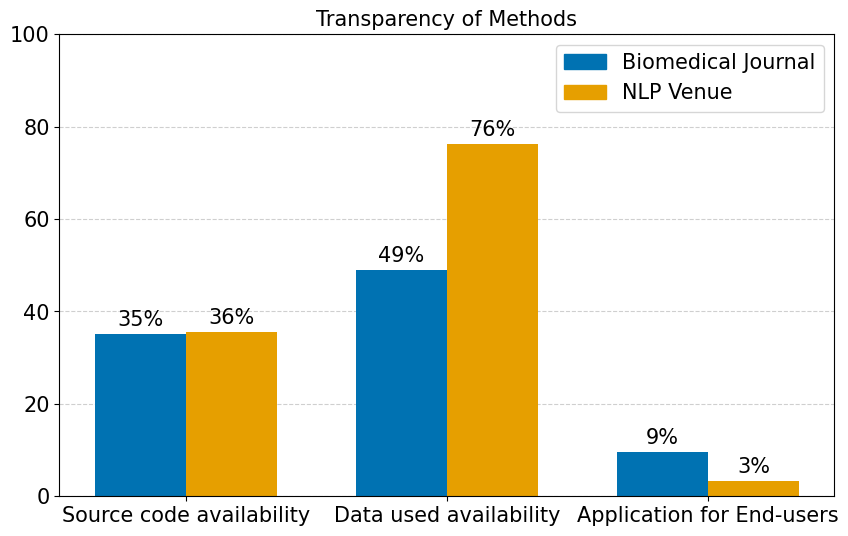

In [41]:
from matplotlib.patches import Patch

# Adjusted code

fig, ax = plt.subplots(figsize=(10, 6))  # Increased plot size

# The x position for each bar
bar_width = 0.35
index = np.arange(len(result.columns) - 1)

bar1 = ax.bar(index, result.iloc[0, 1:], bar_width, label="Biomedical Journal", color="#0072B2",zorder=2)
bar2 = ax.bar(index + bar_width, result.iloc[1, 1:], bar_width, label="NLP Venue", color="#E69F00",zorder=2)

#ax.set_xlabel('Category', fontsize=15)
#ax.set_ylabel('Percentage', fontsize=15)
ax.set_title('Transparency of Methods', fontsize=15)
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(result.columns[1:], fontsize=15)
ax.tick_params(axis='y', labelsize=15)

# Adding a dashed line in the background
plt.grid(axis='y', linestyle='--', alpha=0.6, zorder=1)

ax.set_ylim(0, 100)

# Adding percentage labels on the bars
add_labels(bar1)
add_labels(bar2)

# Create legend handles for each category
legend_handles = [Patch(color="#0072B2", label='Biomedical Journal'), Patch(color="#E69F00", label='NLP Venue')]

# Add color legend
plt.legend(handles=legend_handles, fontsize=15)
plt.savefig('viz/rs_transparency_overview_2024.pdf')

plt.show()


In [443]:
df_overview = df_transparency.groupby(['publication_type', 'New dataset developed']).size().reset_index(name='counts')
df_overview

,publication_type,New dataset developed,counts
0,biomedical_journal,no,49
1,biomedical_journal,yes,40
2,nlp_venue,no,30
3,nlp_venue,yes,22


In [444]:
df_overview = df_transparency.groupby(['publication_type', 'Source code availability']).size().reset_index(name='counts')
df_overview

,publication_type,Source code availability,counts
0,biomedical_journal,no,41
1,biomedical_journal,yes,48
2,nlp_venue,no,31
3,nlp_venue,yes,21


In [445]:
# Group by "publication_type" and "Source code availability" and calculate the percentage
df_grouped = df_transparency.groupby(['publication_type', 'Source code availability']).size().unstack(fill_value=0)
df_grouped_percentage = df_grouped.div(df_grouped.sum(axis=1), axis=0) * 100
df_grouped_percentage

Source code availability,no,yes
publication_type,,
biomedical_journal,46.067416,53.932584
nlp_venue,59.615385,40.384615


In [446]:
df_grouped = df_transparency.groupby(['publication_type', 'Data used availability']).size().unstack(fill_value=0)
df_grouped_percentage = df_grouped.div(df_grouped.sum(axis=1), axis=0) * 100
df_grouped_percentage

Data used availability,no,partially,yes
publication_type,,,
biomedical_journal,21.348315,3.370787,75.280899
nlp_venue,13.461538,0.000000,86.538462


<Figure size 1440x216 with 0 Axes>

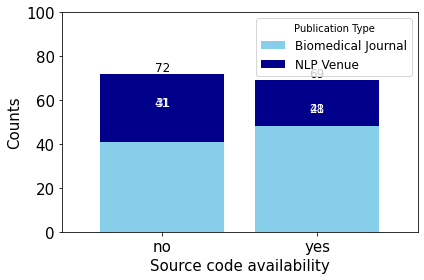

In [428]:
# Create a larger figure
plt.figure(figsize=(20, 3))

# Group by "Source code availability" and "publication_type", then count the occurrences
counts = df_transparency.groupby(['Source code availability', 'publication_type']).size().unstack(fill_value=0)

# Plot the stacked bar chart
bars = counts.plot(kind='bar', stacked=True, color=['skyblue', 'darkblue'], width=0.8)

# Add count values as annotations for each bar
for i, source_avail in enumerate(counts.index):
    for pub_type, count in zip(counts.columns, counts.loc[source_avail]):
        total_count = counts.sum(axis=1)[source_avail]
        plt.text(i, total_count - 13, str(count), color='white' if count < counts.sum(axis=1).max() else 'black', ha='center', va='center', fontsize=12)

# Add total count values on top of each bar
for i, total_count in enumerate(counts.sum(axis=1)):
    plt.text(i, total_count, str(total_count), color='black', ha='center', va='bottom', fontsize=12)
    
# Customize the plot
plt.xticks(range(len(counts.index)), counts.index, rotation=0, fontsize=15)
plt.tick_params(axis='y', labelsize=15)
plt.xlabel('Source code availability', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.legend(['Biomedical Journal', 'NLP Venue'], title='Publication Type', fontsize=12)

# Set the y-axis limit to ensure it reaches up to 100
plt.ylim(0, 100)

# Tight layout for better visualization
plt.tight_layout()

# Display the chart
plt.show()

## Risk of bias

In [2093]:
df = pd.concat([df_initial, df_2024_included], ignore_index=True)
df['year'] = df['year'].astype(int)

In [2094]:
df.columns

Index(['author', 'doi', 'Link to paper', 'title', 'journal', 'year',
       'Extracted by', 'Included', 'Reason for exclusion',
       'Target application', 'Domain of automated approach', 'Target database',
       'Data type', 'Data filter applied', 'Hosted Application for End-users',
       'Alternative Approach', 'LLM Model', 'Models/Resources used with LLM',
       'System Architecture/ Flow', 'Programming language',
       'Library/Framework', 'Library/Framework Harmonized',
       'Reported performance metrics',
       'Reported performance metrics Harmonized', 'Source code availability',
       'Source code link', 'Data used availability', 'Preprocessing applied',
       'Pretraining corpus origin', 'Pretraining corpus size',
       'Fine-tuning corpus data/task', 'New annotations', 'Annotations type',
       'New dataset developed', 'Fine-tuning corpus size',
       'Number of tasks/datasets for performance evaluation',
       'Hardware used for training/validation/fine-tuning'

In [2095]:
df_rob = df[["Internal validity 1", "Internal validity 2", "External validity" ,"External validity.1"]]
# Define the new column names
new_column_names = {
    "Internal validity 1": "data_split_reported",
    "Internal validity 2": "overfitting_avoided",
    "External validity": "compared_to_others",
    "External validity.1": "external_validity"
}
# Rename the columns
df_rob = df_rob.rename(columns=new_column_names)

# Convert column names to lowercase
df_rob = df_rob.applymap(lambda x: x.lower() if isinstance(x, str) else x)

# Replace NaNs with "no"
df_rob = df_rob.fillna('no')

# Replace "yes" with "yes" in 'overfitting_avoided' column
df_rob = df_rob.replace(r'^yes.*', 'yes', regex=True)
df_rob = df_rob.replace(r'^partial.*', 'yes', regex=True)

df_rob.head(5)

,data_split_reported,overfitting_avoided,compared_to_others,external_validity
0,yes,no,no,no
1,yes,no,yes,word2vec
2,yes,no,yes,"cnn, customized text query"
3,yes,no,yes,"cnn, bi-lstm, scifice-large"
4,no,no,yes,"svc, k-beighbors, decision tree, random forest..."


In [2096]:
len(df_rob[df_rob["data_split_reported"]=="yes"])/len(df_rob)

0.8877551020408163

In [2097]:
len(df_rob[df_rob["overfitting_avoided"]=="yes"])/len(df_rob)

0.22448979591836735

In [2098]:
len(df_rob[df_rob["compared_to_others"]=="yes"])/len(df_rob)

0.8418367346938775